<a href="https://colab.research.google.com/github/sanyamjain789523/personalProjects/blob/main/textual_w2Vec_LDACombined_MLImplementations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pip install gensim

In [ ]:
pip install hyperopt

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from nltk import pos_tag # function that tags words by their part of speech (POS)
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import math
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from gensim.models.ldamulticore import LdaMulticore
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


from sklearn import preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(1234)

In [ ]:
#conda install -c aterrel xgboost=0.4.0

In [ ]:
# #Loading all the excel files 

# df1 = pd.read_csv('/content/LDATAMM_1.csv')
# df2 = pd.read_csv('/content/LDATAMM_2.csv')
# df3 = pd.read_csv('/content/LDATAMM_3.csv')
# df4 = pd.read_csv('/content/LDATAMM_4.csv')
# df5 = pd.read_csv('/content/LDATAMM_5.csv')
# df6 = pd.read_csv('/content/LDATAMM_6.csv', encoding = "ISO-8859-1")
# df7 = pd.read_csv('/content/LDATAMM_7.csv')

In [ ]:
# df1 = df1[df1['Date'].notna()]
# df2 = df2[df2['Date'].notna()]
# df3 = df3[df3['Date'].notna()]
# df4 = df4[df4['Date'].notna()]
# df5 = df5[df5['Date'].notna()]
# df6 = df6[df6['Date'].notna()]
# df7 = df7[df7['Date'].notna()]


In [ ]:
# df1

In [ ]:
# # #Loading all the excel files 

# df1 = pd.read_excel('/content/LDATAMM.xlsx','FY21Q1')
# df2 = pd.read_excel('/content/LDATAMM.xlsx','FY20Q1')
# df3 = pd.read_excel('/content/LDATAMM.xlsx','FY20Q2')
# df4 = pd.read_excel('/content/LDATAMM.xlsx','FY20Q3')
# df5 = pd.read_excel('/content/LDATAMM.xlsx','FY20Q4')
# df6 = pd.read_excel('/content/LDATAMM.xlsx','FY19Q1')
# df7 = pd.read_excel('/content/LDATAMM.xlsx','FY19Q2')

In [ ]:
# # merging all excel tabs into a single df 
# df_final = pd.concat([df1,df2,df3,df4,df5,df6,df7], ignore_index = True)

In [ ]:
# #Loading all the excel files 

df1 = pd.read_excel('ALLDATA.xlsx','All')


In [ ]:
# merging all excel tabs into a single df 
df_final = pd.concat([df1], ignore_index = True)

# Natural Language Processing (NLP)

# Removing Patterns

In [ ]:
df_final.shape

(3132, 9)

In [ ]:
df_final.head()

Date          State  ... Classification Comments
0  10/1/2020       NEW YORK  ...        Minimal      NaN
1  10/1/2020       COLORADO  ...   Catastrophic      NaN
2  10/2/2020       COLORADO  ...      Hazardous      NaN
3  10/2/2020        ARIZONA  ...          Minor      NaN
4  10/2/2020  MASSACHUSETTS  ...          Minor      NaN

[5 rows x 9 columns]

In [ ]:
pattern = r"\&\#[0-9]+\;"
# From beginning until the end of the string, match one or more of these characters.
#+ means to match 1 or more of the preceeding token.
# https://docs.python.org/3/library/re.html
df_final["preprocessed"] = df_final["Narrative"].str.replace(pat=pattern, repl="", regex=True)

In [ ]:
for i,v in enumerate(df_final['preprocessed']):
   print(i,v)

0 PRELIM INFO FROM FAA OPS: WESTHAMPTON BEACH, NY/UAS INCIDENT/1411E/NEW YORK TRACON ADVISED  CL35, FOK - OMA, REPORTED SMALL WHITE UAS WHILE AT 1,200 FEET DURING DEPARTURE FROM WESTHAMPTON BEACH. NO EVASIVE ACTION TAKEN. WEST HAMPTON BEACH PD NOTIFIED.
1 PRELIM INFO FROM FAA OPS: COLORADO SPRINGS, CO/UAS INCIDENT/1401M/COLORADO SPRINGS ATCT ADVISED PIPER P28A, REPORTED WHITE UAS 100 FEET BELOW ACFT WHILE AT 7,200 FEET 1 W APCH END RUNWAY 17R. NO EVASIVE ACTION TAKEN. COLORADO SPRINGS PD NOTIFIED.
2 PRELIM INFO FROM FAA OPS: DENVER, CO/UAS INCIDENT/1056M/DEN TRACON ADVISED BEECH BE20, MDD - APA, REPORTED A WHITE UAS AT THE 12 O'CLOCK POSITION 500 FEET BELOW ACFT WHILE W BOUND AT 10,000 FEET 8 S CENTENNIAL ARPT. NO EVASIVE ACTION TAKEN. DENVER ARPT PD NOTIFIED.
3 PRELIM INFO FROM FAA OPS: PRESCOTT, AZ/UAS INCIDENT/1343M/PRESCOTT ATCT ADVISED CESSNA C172, REPORTED OVERFLYING A UAS AT WHILE AT 6,000 FEET 3 S PRESCOTT ARPT. UAS WAS FLYING OVER WATSON LAKE. NO EVASIVE ACTION WAS REPORTED. N

# "Data Cleaning #1"

In [ ]:
Clean1 = []
for ind, i in enumerate(df_final["preprocessed"]):
    # check if 'REPORTED' exist in the sentence 
    # if it does grab evry thing after 'REPORTED' 
    if "REPORTED" in i:
    #append  
        Clean1.append(i.split("REPORTED",1)[1])
    # grab evrything after ':'
    elif "OBSERVED" in i:
    #append  
        Clean1.append(i.split("OBSERVED",1)[1])
    elif "ADVISED" in i:
    #append  
        Clean1.append(i.split("ADVISED",1)[1])    
    else:
    # append    
        Clean1.append(i.split(':')[1])

### split at summary

In [ ]:
Clean2 = []
for ind, i in enumerate(Clean1):
    # check if 'REPORTED' exist in the sentence 
    # if it does grab evry thing after 'REPORTED' 
    if "SUMMARY" in i:
    #append  
        Clean2.append(i.split("SUMMARY",1)[1])
    else:
        Clean2.append(i)
        # break

In [ ]:
# optional if you need to pass the summary results further ahead
# Clean1 = Clean2

In [ ]:
len(Clean1 )

3132

In [ ]:
df_final['preprocessed2'] = Clean1 

In [ ]:
len(df_final["preprocessed2"])

3132

In [ ]:
for i,v in enumerate(Clean1):
   print(i,v)

0  SMALL WHITE UAS WHILE AT 1,200 FEET DURING DEPARTURE FROM WESTHAMPTON BEACH. NO EVASIVE ACTION TAKEN. WEST HAMPTON BEACH PD NOTIFIED.
1  WHITE UAS 100 FEET BELOW ACFT WHILE AT 7,200 FEET 1 W APCH END RUNWAY 17R. NO EVASIVE ACTION TAKEN. COLORADO SPRINGS PD NOTIFIED.
2  A WHITE UAS AT THE 12 O'CLOCK POSITION 500 FEET BELOW ACFT WHILE W BOUND AT 10,000 FEET 8 S CENTENNIAL ARPT. NO EVASIVE ACTION TAKEN. DENVER ARPT PD NOTIFIED.
3  OVERFLYING A UAS AT WHILE AT 6,000 FEET 3 S PRESCOTT ARPT. UAS WAS FLYING OVER WATSON LAKE. NO EVASIVE ACTION WAS REPORTED. NO LAW ENFORCEMENT NOTIFICATION WAS REPORTED.
4  A WHITE UAS FROM THE 3 O'CLOCK POSITION WHILE NE BOUND AT 1,400 FEET ON 3 MILE FINAL RUNWAY 32. NO EVASIVE ACTION TAKEN. DARTMOUTH PD NOTIFIED.
5  A UAS 100 FEET OFF LEFT WING WHILE WSW BOUND AT 800 FEET 1 N EVB. NO EVASIVE ACTION TAKEN. TOWER ALSO OBSERVED THE UAS. NEW SMYRNA BEACH PD NOTIFIED.
6  A SILVER UAS AT 1,200 FEET WHILE ON 3 MILE FINAL RUNWAY 4R. NO EVASIVE ACTION TAKEN. MA STAT

# Data Cleaning #2

In [ ]:
Clean2  = []
from nltk import word_tokenize
for i,v in enumerate(df_final["preprocessed2"]):
    if 'WHILE W BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE W BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE W BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE W BOUND AT")[1])[2:]))
    elif 'WHILE WEST BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE WEST BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE WEST BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE WEST BOUND AT")[1])[2:]))
    elif 'WHILE E BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE E BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE E BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE E BOUND AT")[1])[2:]))
    elif 'WHILE S BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE S BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE S BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE S BOUND AT")[1])[2:]))
    elif 'WHILE SOUTH BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE SOUTH BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE SOUTH BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE SOUTH BOUND AT")[1])[2:])) 
    elif 'WHILE NORTH BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE NORTH BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE NORTH BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE NORTH BOUND AT")[1])[2:]))
    elif 'WHILE SW BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE SW BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE SW BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE SW BOUND AT")[1])[2:]))
    elif 'WHILE SE BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE SE BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE SE BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE SE BOUND AT")[1])[2:]))
    elif 'WHILE ENE BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE ENE BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE ENE BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE ENE BOUND AT")[1])[2:]))
    elif 'AT SAME ALTITUDE OF' in v:
        #print(word_tokenize(v.split("AT SAME ALTITUDE OF")[1])[:2])
        Clean2.append(v.split("AT SAME ALTITUDE OF")[0] + " ".join(word_tokenize(v.split("AT SAME ALTITUDE OF")[1])[2:]))
    elif 'WHILE N BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE N BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE N BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE N BOUND AT")[1])[2:]))
    elif 'WHILE NE BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE NE BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE NE BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE NE BOUND AT")[1])[2:])) 
    elif 'WHILE NW BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE NW BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE NW BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE NW BOUND AT")[1])[2:]))
    elif 'WHILE SSW BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE SSW BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE SSW BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE SSW BOUND AT")[1])[2:]))
    elif 'WHILE WSW BOUND AT' in v:
        #print(word_tokenize(v.split("WHILE WSW BOUND AT")[1])[:2])
        Clean2.append(v.split("WHILE WSW BOUND AT")[0] + " ".join(word_tokenize(v.split("WHILE WSW BOUND AT")[1])[2:]))
    else:
        Clean2.append(v)

In [ ]:
#AT SAME ALTITUDE add block to get rid of 

PLEASE EXPLAIN THE OUTPUT ABOVE. 

In [ ]:
len(Clean2)

3132

In [ ]:
df_final['preprocessed2'] = Clean2

# Data Cleaning#3

In [ ]:
for i,v in enumerate(df_final["preprocessed2"]):
    for i2,word in enumerate(v.split()):
        
        if word =='AT':
            stringstoreplace = []
            try:
                
                if len((v.split()[i2+1]))>=3 and v.split()[i2+1] !='THE' and v.split()[i2+1] !='HIS' :
                
                    k = []
                    #print(i,v.split()[i2],v.split()[i2+1],v.split()[i2+2])
                    k.append(v.split()[i2] + ' '+ v.split()[i2+1] + ' ' +v.split()[i2+2])
                    for num in range(0,len(k)): 
                        # the words that will be removed 
                        # print(i,k[num])
                        df_final["preprocessed2"][i] = df_final["preprocessed2"][i].replace(k[num],'')
            # excepting index error             
            except IndexError:
                     pass  
                
#stringstoreplace                 

In [ ]:
for i,v in enumerate(df_final["preprocessed2"]):
    print(i,v)

0  SMALL WHITE UAS WHILE  DURING DEPARTURE FROM WESTHAMPTON BEACH. NO EVASIVE ACTION TAKEN. WEST HAMPTON BEACH PD NOTIFIED.
1  WHITE UAS 100 FEET BELOW ACFT WHILE  1 W APCH END RUNWAY 17R. NO EVASIVE ACTION TAKEN. COLORADO SPRINGS PD NOTIFIED.
2  A WHITE UAS AT THE 12 O'CLOCK POSITION 500 FEET BELOW ACFT 8 S CENTENNIAL ARPT . NO EVASIVE ACTION TAKEN . DENVER ARPT PD NOTIFIED .
3  OVERFLYING A UAS  6,000 FEET 3 S PRESCOTT ARPT. UAS WAS FLYING OVER WATSON LAKE. NO EVASIVE ACTION WAS REPORTED. NO LAW ENFORCEMENT NOTIFICATION WAS REPORTED.
4  A WHITE UAS FROM THE 3 O'CLOCK POSITION ON 3 MILE FINAL RUNWAY 32 . NO EVASIVE ACTION TAKEN . DARTMOUTH PD NOTIFIED .
5  A UAS 100 FEET OFF LEFT WING 1 N EVB . NO EVASIVE ACTION TAKEN . TOWER ALSO OBSERVED THE UAS . NEW SMYRNA BEACH PD NOTIFIED .
6  A SILVER UAS  WHILE ON 3 MILE FINAL RUNWAY 4R. NO EVASIVE ACTION TAKEN. MA STATE PD NOTIFIED.
7  A SILVER UAS 500 FEET ABOVE ACFT 5 E CLT . NO EVASIVE ACTION TAKEN . CHARLOTTE METRO PD NOTIFIED .
8  A SILV

In [ ]:
len(df_final["preprocessed2"])

3132

In [ ]:
# test sentence here 
# debug 
f1 = "UAS AT 10 O'CLOCK 200 FEET ABOVE WHILE AT 400 FEET .75 W BEVERLY. NO EVASIVE ACTION TAKEN. DANVERS PD NOTIFIED.Summary: departing RWY 27 @ BVY, left turnout, climbing out of 600' reported a drone off his right side over High School @ 300 to 400 feet. The pilot thought that they could see the operator on the ground. Danvers Police were dispatched immediately, but were unable to find the drone or it's operator. There were no further drone sightings reported to the tower."
f1

"UAS AT 10 O'CLOCK 200 FEET ABOVE WHILE AT 400 FEET .75 W BEVERLY. NO EVASIVE ACTION TAKEN. DANVERS PD NOTIFIED.Summary: departing RWY 27 @ BVY, left turnout, climbing out of 600' reported a drone off his right side over High School @ 300 to 400 feet. The pilot thought that they could see the operator on the ground. Danvers Police were dispatched immediately, but were unable to find the drone or it's operator. There were no further drone sightings reported to the tower."

In [ ]:
import re
corr = []
for i,v in enumerate(f1.split()):
    if v =='AT':
         if len((f1.split()[i+1]))>=3 and f1.split()[i+1] !='THE' and f1.split()[i+1] !='HIS':
                print(f1.split()[i],f1.split()[i+1],f1.split()[i+2])
                #k = []
                #k.append(f1.split()[i] + ' '+ f1.split()[i+1] + ' ' +f1.split()[i+2])
                #for num,g in enumerate(k):
                      #f1 =  f1.replace(g, '____x_____-')
                        #corr.append(f1)
                        #print(g)
                

AT 400 FEET


In [ ]:
for i,v in enumerate(df_final["preprocessed2"]):
    print(i,v)

0  SMALL WHITE UAS WHILE  DURING DEPARTURE FROM WESTHAMPTON BEACH. NO EVASIVE ACTION TAKEN. WEST HAMPTON BEACH PD NOTIFIED.
1  WHITE UAS 100 FEET BELOW ACFT WHILE  1 W APCH END RUNWAY 17R. NO EVASIVE ACTION TAKEN. COLORADO SPRINGS PD NOTIFIED.
2  A WHITE UAS AT THE 12 O'CLOCK POSITION 500 FEET BELOW ACFT 8 S CENTENNIAL ARPT . NO EVASIVE ACTION TAKEN . DENVER ARPT PD NOTIFIED .
3  OVERFLYING A UAS  6,000 FEET 3 S PRESCOTT ARPT. UAS WAS FLYING OVER WATSON LAKE. NO EVASIVE ACTION WAS REPORTED. NO LAW ENFORCEMENT NOTIFICATION WAS REPORTED.
4  A WHITE UAS FROM THE 3 O'CLOCK POSITION ON 3 MILE FINAL RUNWAY 32 . NO EVASIVE ACTION TAKEN . DARTMOUTH PD NOTIFIED .
5  A UAS 100 FEET OFF LEFT WING 1 N EVB . NO EVASIVE ACTION TAKEN . TOWER ALSO OBSERVED THE UAS . NEW SMYRNA BEACH PD NOTIFIED .
6  A SILVER UAS  WHILE ON 3 MILE FINAL RUNWAY 4R. NO EVASIVE ACTION TAKEN. MA STATE PD NOTIFIED.
7  A SILVER UAS 500 FEET ABOVE ACFT 5 E CLT . NO EVASIVE ACTION TAKEN . CHARLOTTE METRO PD NOTIFIED .
8  A SILV

In [ ]:
print("Value of row 5")
display(df_final['preprocessed2'].iloc[66])

Value of row 5


" A WHITE 2 FOOT UAS FROM THE 3 O'CLOCK POSITION 500 FEET BELOW ACFT 10 SSE MWH . NO EVASIVE ACTION TAKEN . MOSES LAKE MACC NOTIFIED ."

In [ ]:
print("Value of row 8")
display(df_final['preprocessed2'].iloc[5])

Value of row 8


' A UAS 100 FEET OFF LEFT WING 1 N EVB . NO EVASIVE ACTION TAKEN . TOWER ALSO OBSERVED THE UAS . NEW SMYRNA BEACH PD NOTIFIED .'

In [ ]:
for i,v in enumerate(Clean2):
   print(i,v)

0  SMALL WHITE UAS WHILE AT 1,200 FEET DURING DEPARTURE FROM WESTHAMPTON BEACH. NO EVASIVE ACTION TAKEN. WEST HAMPTON BEACH PD NOTIFIED.
1  WHITE UAS 100 FEET BELOW ACFT WHILE AT 7,200 FEET 1 W APCH END RUNWAY 17R. NO EVASIVE ACTION TAKEN. COLORADO SPRINGS PD NOTIFIED.
2  A WHITE UAS AT THE 12 O'CLOCK POSITION 500 FEET BELOW ACFT 8 S CENTENNIAL ARPT . NO EVASIVE ACTION TAKEN . DENVER ARPT PD NOTIFIED .
3  OVERFLYING A UAS AT WHILE AT 6,000 FEET 3 S PRESCOTT ARPT. UAS WAS FLYING OVER WATSON LAKE. NO EVASIVE ACTION WAS REPORTED. NO LAW ENFORCEMENT NOTIFICATION WAS REPORTED.
4  A WHITE UAS FROM THE 3 O'CLOCK POSITION ON 3 MILE FINAL RUNWAY 32 . NO EVASIVE ACTION TAKEN . DARTMOUTH PD NOTIFIED .
5  A UAS 100 FEET OFF LEFT WING 1 N EVB . NO EVASIVE ACTION TAKEN . TOWER ALSO OBSERVED THE UAS . NEW SMYRNA BEACH PD NOTIFIED .
6  A SILVER UAS AT 1,200 FEET WHILE ON 3 MILE FINAL RUNWAY 4R. NO EVASIVE ACTION TAKEN. MA STATE PD NOTIFIED.
7  A SILVER UAS 500 FEET ABOVE ACFT 5 E CLT . NO EVASIVE ACTI

# Convert Upper Case to Lower Case

In [ ]:
df_final['preprocessed2'] = df_final['preprocessed2'] .str.lower()

In [ ]:
for i,v in enumerate(df_final['preprocessed2'] ):
   print(i,v)

0  small white uas while  during departure from westhampton beach. no evasive action taken. west hampton beach pd notified.
1  white uas 100 feet below acft while  1 w apch end runway 17r. no evasive action taken. colorado springs pd notified.
2  a white uas at the 12 o'clock position 500 feet below acft 8 s centennial arpt . no evasive action taken . denver arpt pd notified .
3  overflying a uas  6,000 feet 3 s prescott arpt. uas was flying over watson lake. no evasive action was reported. no law enforcement notification was reported.
4  a white uas from the 3 o'clock position on 3 mile final runway 32 . no evasive action taken . dartmouth pd notified .
5  a uas 100 feet off left wing 1 n evb . no evasive action taken . tower also observed the uas . new smyrna beach pd notified .
6  a silver uas  while on 3 mile final runway 4r. no evasive action taken. ma state pd notified.
7  a silver uas 500 feet above acft 5 e clt . no evasive action taken . charlotte metro pd notified .
8  a silv

# Tokenization

In [ ]:
corpora = df_final['preprocessed2'].values
tokenized = [corpus.split(" ") for corpus in corpora]

In [ ]:
for i,v in enumerate(tokenized):
    print(i,v)

0 ['', 'small', 'white', 'uas', 'while', '', 'during', 'departure', 'from', 'westhampton', 'beach.', 'no', 'evasive', 'action', 'taken.', 'west', 'hampton', 'beach', 'pd', 'notified.']
1 ['', 'white', 'uas', '100', 'feet', 'below', 'acft', 'while', '', '1', 'w', 'apch', 'end', 'runway', '17r.', 'no', 'evasive', 'action', 'taken.', 'colorado', 'springs', 'pd', 'notified.']
2 ['', 'a', 'white', 'uas', 'at', 'the', '12', "o'clock", 'position', '500', 'feet', 'below', 'acft', '8', 's', 'centennial', 'arpt', '.', 'no', 'evasive', 'action', 'taken', '.', 'denver', 'arpt', 'pd', 'notified', '.']
3 ['', 'overflying', 'a', 'uas', '', '6,000', 'feet', '3', 's', 'prescott', 'arpt.', 'uas', 'was', 'flying', 'over', 'watson', 'lake.', 'no', 'evasive', 'action', 'was', 'reported.', 'no', 'law', 'enforcement', 'notification', 'was', 'reported.']
4 ['', 'a', 'white', 'uas', 'from', 'the', '3', "o'clock", 'position', 'on', '3', 'mile', 'final', 'runway', '32', '.', 'no', 'evasive', 'action', 'taken', '

# Lemmatization

In [ ]:
# By default, the lemmatizer takes in an input string and tries to lemmatize it, 
# so if you pass in a word, it would lemmatize it treating it as a noun, 
# it does take the POS tag into account.
#To make the lemmatization better and context dependent,
# we would firstneed to find out the POS tag and pass it on to the lemmatizer. 
# https://gaurav5430.medium.com/using-nltk-for-lemmatizing-sentences-c1bfff963258
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", "punkt", \
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]
# find the word,if the word does not exist 
# raise an exception and download another tagger
for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document) 
    for sentence in tokenized_sent:
        # remove punctuation (replace pattern with empty space)
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        # split into tokens
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df_final['preprocessed2'] = df_final['preprocessed2'].apply(lambda row: lemmatize_doc(row))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


In [ ]:
for i,v in enumerate(df_final['preprocessed2']):
    print(i,v)

0 small white uas while during departure from westhampton beach no evasive action take west hampton beach pd notify
1 white uas 100 foot below acft while 1 w apch end runway 17r no evasive action take colorado spring pd notify
2 a white uas at the 12 o clock position 500 foot below acft 8 s centennial arpt no evasive action take denver arpt pd notify
3 overfly a uas 6 000 foot 3 s prescott arpt uas be fly over watson lake no evasive action be report no law enforcement notification be report
4 a white uas from the 3 o clock position on 3 mile final runway 32 no evasive action take dartmouth pd notify
5 a uas 100 foot off leave wing 1 n evb no evasive action take tower also observe the uas new smyrna beach pd notify
6 a silver uas while on 3 mile final runway 4r no evasive action take ma state pd notify
7 a silver uas 500 foot above acft 5 e clt no evasive action take charlotte metro pd notify
8 a silver uas while on 3 mile final runway 4r no evasive action take ma state pd notify
9 a ua

In [ ]:
CSwords = [  ':',
'to',
'a',
'advise',
'an',
'and',
'approx.',
'approximately',
'at',
'authority',
'balloon',
'be',
'black',
'blue',
'brown',
'cessna',
'city',
'color',
'county',
'craft',
'dark',
'den',
'department',
'description',
'diameter',
'dp',
'enforcement',
'fbi',
'fixed'
'from',
'gold'
'gray',
'green',
'he',
'hover',
'indigo', 
'it',
'large',
'law',
'leo',
'light',
'Local', 
'metallic',
'notification',
'notify',
'object',
'officer',
'on',
'or',
'orange',
'oval',
'pd',
'phantom',
'pilot',
'pink',
'police',
'position',
'quadcopter',
'red',
'rotor',
'see',
'sheriff',
'shiny',
'silver',
'size',
'small',
'stationary',
'the',
'tracon',
'Turquoise',
'unknown',
'violet',
'visually',
'white',
'yellow',]


In [ ]:
for i,v in enumerate(CSwords):
    print(i,v)

0 :
1 to
2 a
3 advise
4 an
5 and
6 approx.
7 approximately
8 at
9 authority
10 balloon
11 be
12 black
13 blue
14 brown
15 cessna
16 city
17 color
18 county
19 craft
20 dark
21 den
22 department
23 description
24 diameter
25 dp
26 enforcement
27 fbi
28 fixedfrom
29 goldgray
30 green
31 he
32 hover
33 indigo
34 it
35 large
36 law
37 leo
38 light
39 Local
40 metallic
41 notification
42 notify
43 object
44 officer
45 on
46 or
47 orange
48 oval
49 pd
50 phantom
51 pilot
52 pink
53 police
54 position
55 quadcopter
56 red
57 rotor
58 see
59 sheriff
60 shiny
61 silver
62 size
63 small
64 stationary
65 the
66 tracon
67 Turquoise
68 unknown
69 violet
70 visually
71 white
72 yellow


In [ ]:
len(CSwords)

73

In [ ]:
remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in CSwords])
df_final['preprocessed2']=df_final['preprocessed2'].apply(remove_stop_words)

In [ ]:
for i,v in enumerate(df_final['preprocessed2']):
    print(i,v)

0 uas while during departure from westhampton beach no evasive action take west hampton beach
1 uas 100 foot below acft while 1 w apch end runway 17r no evasive action take colorado spring
2 uas 12 o clock 500 foot below acft 8 s centennial arpt no evasive action take denver arpt
3 overfly uas 6 000 foot 3 s prescott arpt uas fly over watson lake no evasive action report no report
4 uas from 3 o clock 3 mile final runway 32 no evasive action take dartmouth
5 uas 100 foot off leave wing 1 n evb no evasive action take tower also observe uas new smyrna beach
6 uas while 3 mile final runway 4r no evasive action take ma state
7 uas 500 foot above acft 5 e clt no evasive action take charlotte metro
8 uas while 3 mile final runway 4r no evasive action take ma state
9 uas off right side while 5 mile final runway 19 no evasive action take not provide
10 uas possible 4 after deperting runway 4l 3 ne ewr no evasive action take new jersey
11 uas 60 foot below while nnw bound while in descent river

In [ ]:
corpora = df_final['preprocessed2'].values
tokenized = [corpus.split(" ") for corpus in corpora]

In [ ]:
for i,v in enumerate(tokenized):
    print(i,v)

0 ['uas', 'while', 'during', 'departure', 'from', 'westhampton', 'beach', 'no', 'evasive', 'action', 'take', 'west', 'hampton', 'beach']
1 ['uas', '100', 'foot', 'below', 'acft', 'while', '1', 'w', 'apch', 'end', 'runway', '17r', 'no', 'evasive', 'action', 'take', 'colorado', 'spring']
2 ['uas', '12', 'o', 'clock', '500', 'foot', 'below', 'acft', '8', 's', 'centennial', 'arpt', 'no', 'evasive', 'action', 'take', 'denver', 'arpt']
3 ['overfly', 'uas', '6', '000', 'foot', '3', 's', 'prescott', 'arpt', 'uas', 'fly', 'over', 'watson', 'lake', 'no', 'evasive', 'action', 'report', 'no', 'report']
4 ['uas', 'from', '3', 'o', 'clock', '3', 'mile', 'final', 'runway', '32', 'no', 'evasive', 'action', 'take', 'dartmouth']
5 ['uas', '100', 'foot', 'off', 'leave', 'wing', '1', 'n', 'evb', 'no', 'evasive', 'action', 'take', 'tower', 'also', 'observe', 'uas', 'new', 'smyrna', 'beach']
6 ['uas', 'while', '3', 'mile', 'final', 'runway', '4r', 'no', 'evasive', 'action', 'take', 'ma', 'state']
7 ['uas', 

# PRINT Narratives after Cleaning + stopwords Removal

In [ ]:
#df_final[['preprocessed2','Classification']].to_csv('test.csv')

# APPLY 2nd N-Grams Generation

GOAL: to check frequent Grams after 1st round of cleaning the data

In [ ]:
def generate_ngrams(text, n=2):
    words = text.split()
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]

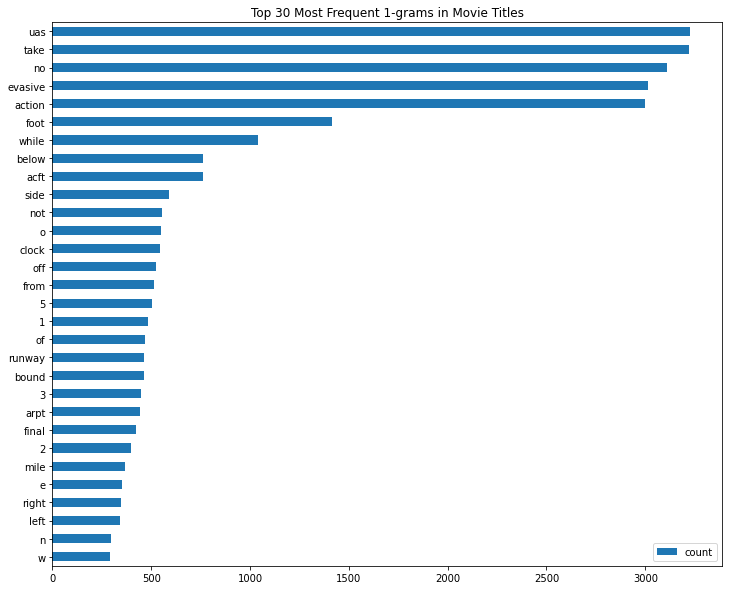

In [ ]:
n = 1 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in df_final['preprocessed2']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent {}-grams in Movie Titles'.format(size, n)
ngrams_df.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

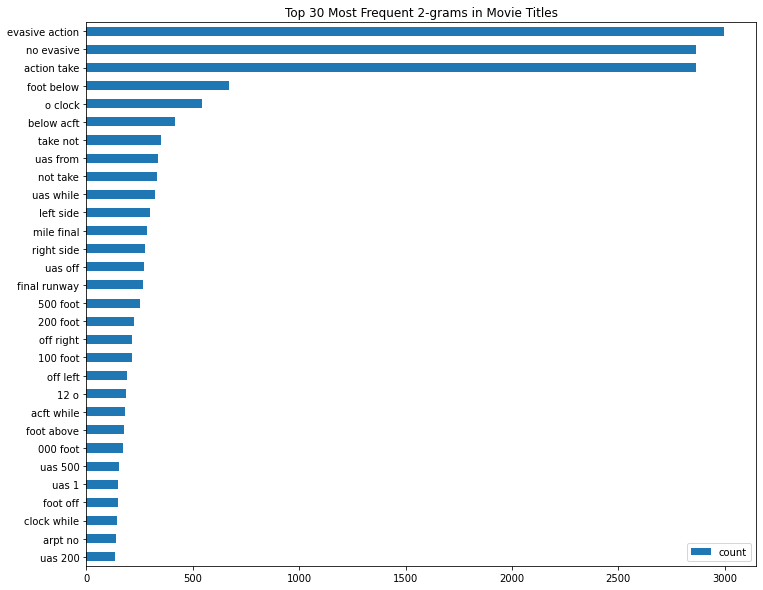

In [ ]:
n = 2 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in df_final['preprocessed2']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent {}-grams in Movie Titles'.format(size, n)
ngrams_df.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

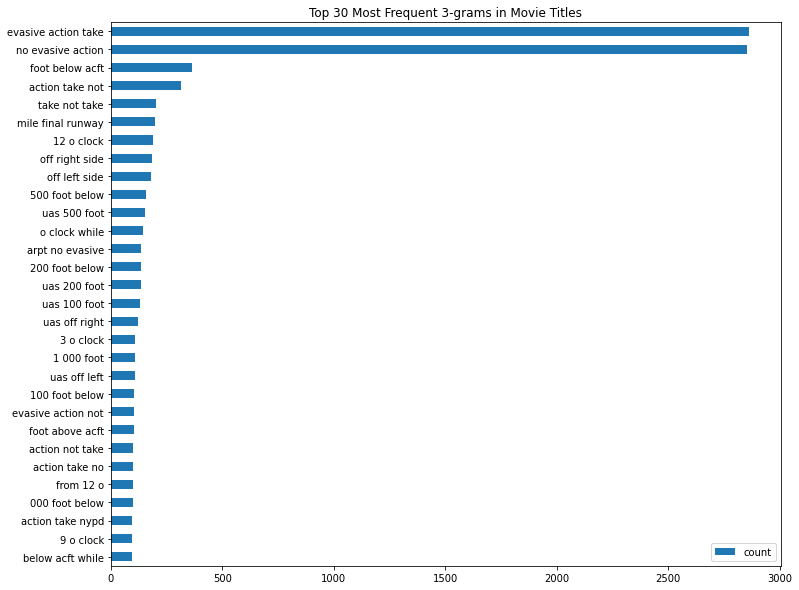

In [ ]:
n = 3 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in df_final['preprocessed2']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent {}-grams in Movie Titles'.format(size, n)
ngrams_df.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

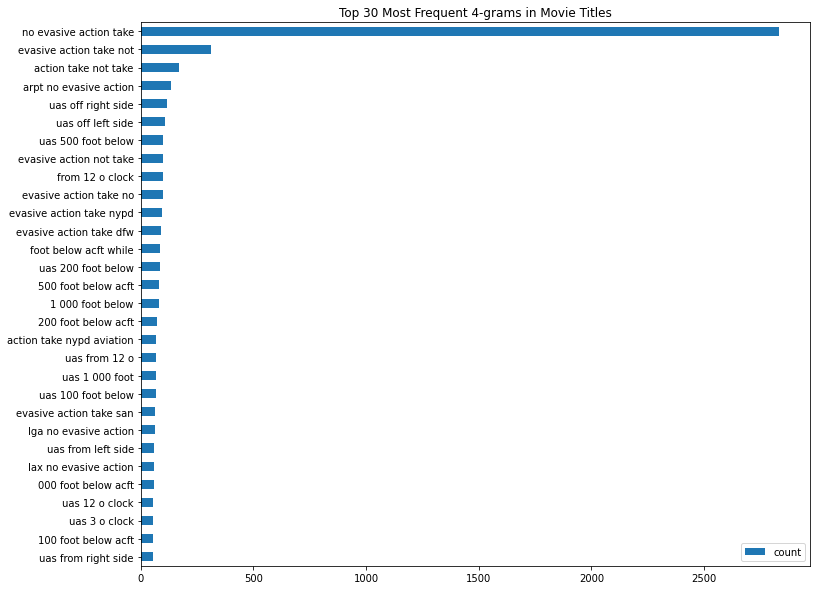

In [ ]:
n = 4 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in df_final['preprocessed2']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent {}-grams in Movie Titles'.format(size, n)
ngrams_df.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

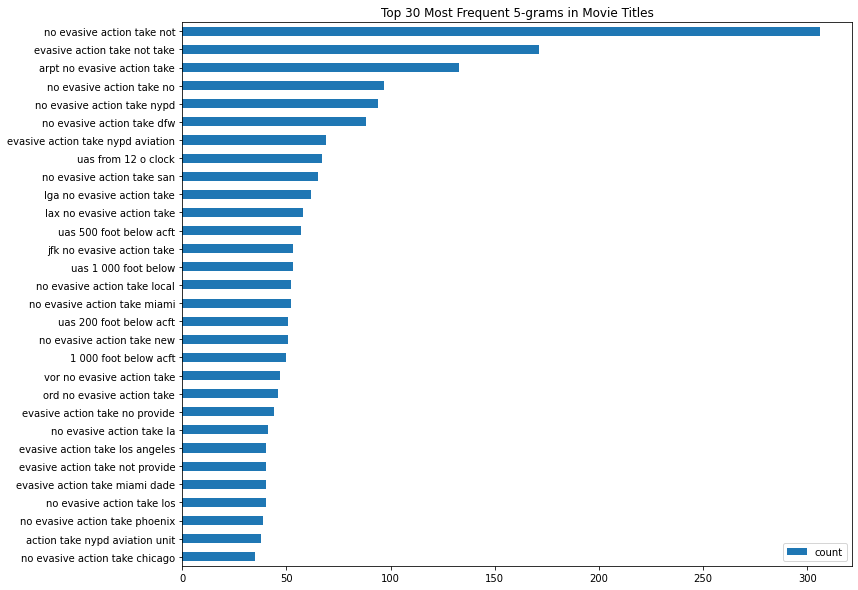

In [ ]:
n = 5 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in df_final['preprocessed2']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent {}-grams in Movie Titles'.format(size, n)
ngrams_df.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

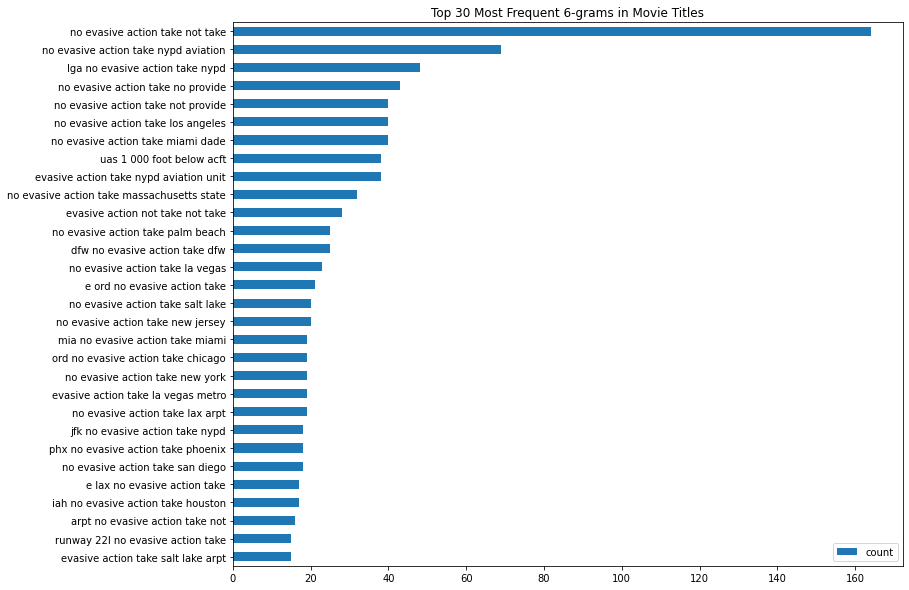

In [ ]:
n = 6 # n is the length of the ngram, 2 = bigram, 3 = trigram, etc.
ngrams = {}
for title in df_final['preprocessed2']:
    for ngram in generate_ngrams(title, n):
        ngram = ' '.join(ngram)
        if ngram in ngrams:
            ngrams[ngram] += 1
        else:
            ngrams[ngram] = 1

ngrams_df = pd.DataFrame.from_dict(ngrams, orient='index')
ngrams_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent {}-grams in Movie Titles'.format(size, n)
ngrams_df.sort_values(by='count').tail(size).plot(kind='barh', logx=False, figsize=(12,10), title=title)

# Saving final processed data

In [ ]:
# df_final.to_csv("df_final.csv")

# Embedding Word2Vec

In [ ]:
#pip install top2vec

In [ ]:
from gensim.models import word2vec
np.set_printoptions(suppress=True)

feature_size = 150
context_size= 2
min_word = 1
word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

In [ ]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]
# unpacking vecs tpo create singulrized dataframe 
tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

tokenized_array = np.array(tokenized)
model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])
model_df = pd.DataFrame(model_array)
# manually adding the label 
model_df["label"] = df_final["Classification"]

display(model_df.head())

0         1         2  ...       148       149         label
0 -0.120880 -0.030241  0.404456  ... -0.626173 -0.049490       Minimal
1 -0.167378 -0.178002  0.256088  ... -0.628384  0.148438  Catastrophic
2 -0.124523 -0.164152  0.174837  ... -0.450338  0.219642     Hazardous
3 -0.011155 -0.111686  0.252686  ... -0.310112  0.197289         Minor
4 -0.251846 -0.077009  0.178345  ... -0.746833  0.073170         Minor

[5 rows x 151 columns]

In [ ]:
#model_df["label"] aka model_df.label when you want to access values model_df.label.values

## Word2vec Custom Training 

In [ ]:
def make_hparam_string(feature_size, context_size, min_word):
    string =  'size=' + str(feature_size) + "," + 'window=' + str(context_size) + ',' + 'min_count=' + str(min_word)          
    
    return string

accuracy = []
feat_size = []
con_size = []
min_w = []

for feature_size in [50, 100,150,300,350,400]:
    # Try some different size skip windows
    for context_size in [2, 5,10,15]:
      # Try some different input reuse values
      for min_word in [2,5,10,15]:
            #hparam_str = make_hparam_string(feature_size, context_size, min_word)
            #print(hparam_str)
            model_test = word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)
            #print(model_test)
            word_vec_unpack_test = [(word, idx.index) for word, idx in \
                   model_test.wv.vocab.items()]
# unpacking vecs tpo create singulrized dataframe 
            tokens, indexes = zip(*word_vec_unpack_test)

            word_vec_df_test = pd.DataFrame(model_test.wv.syn0[indexes, :], index=tokens)

            tokenized_array_test = np.array(tokenized)
            model_array_test = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])
            model_df_test2 = pd.DataFrame(model_array)
# manually adding the label 
            model_df_test2["label"] = df_final["Classification"]
            #print(model_df_test.head(5))
            from sklearn import preprocessing
            le = preprocessing.LabelEncoder()
            model_df_test2['label_values'] = le.fit_transform(model_df_test2.label.values)
            from sklearn.model_selection import train_test_split
            X_wv = model_df_test2.drop(['label_values','label'],axis = 1)
            y_wv = model_df_test2['label_values']
            X_train_wv, X_test_wv, y_train_wv, y_test_wv = train_test_split(X_wv, y_wv, test_size = 0.3, random_state = 42)
            final_mod_wv = LinearSVC()
            final_mod_wv.fit(X_train_wv,y_train_wv)
            final_mod_res_wv = final_mod_wv.predict(X_test_wv)
            accuracy.append(metrics.accuracy_score(final_mod_res_wv,y_test_wv))
            feat_size.append(feature_size)
            con_size.append(context_size)
            min_w.append(min_word)
            

In [ ]:
wv_loop_results = pd.DataFrame(
    {'accuracy': accuracy,
     'feat_size': feat_size,
     'con_size': con_size,
     'min_w':min_w
    })

In [ ]:
wv_loop_results.sort_values('accuracy', ascending=False)
# top results 

accuracy  feat_size  con_size  min_w
0   0.686520         50         2      2
59  0.686520        300        10     15
35  0.686520        150         2     15
36  0.686520        150         5      2
37  0.686520        150         5      5
..       ...        ...       ...    ...
55  0.684953        300         5     15
56  0.684953        300        10      2
57  0.684953        300        10      5
58  0.684953        300        10     10
95  0.684953        400        15     15

[96 rows x 4 columns]

# COMBINE Word2Vec with LDA

In [ ]:
# df_final.head(1)

In [ ]:
df_final['text'] = df_final.preprocessed2.str.lower()
df_final['tokenized_text'] = list(map(nltk.word_tokenize, df_final.text))

#df['text'] = df.text.str.lower()
#df['tokenized_text'] = list(map(nltk.word_tokenize, df.text))

In [ ]:
# optional 
df_final['document_sentences'] = df_final.preprocessed2.str.split('.')  # split texts into individual sentences
#df_final['tokenized_sentences'] = df_final['tokenized_sentences'].fillna('').astype(str)

df_final['tokenized_sentences'] = list(map(lambda sentences:
                                         list(map(nltk.word_tokenize, sentences)),
                                         df_final.document_sentences))

In [ ]:
#df_final['tokenized_sentences'] = df_final['tokenized_sentences'].fillna('').astype(str)

from gensim.corpora import Dictionary
dictionary = Dictionary(documents=df_final.tokenized_text.values)
print("Found {} words.".format(len(dictionary.values())))

Found 2506 words.


In [ ]:
def document_to_bow(df):
    df['bow'] = list(map(lambda doc: dictionary.doc2bow(doc), df_final.tokenized_text.values))
    
document_to_bow(df_final)

In [ ]:
corpus = df_final.bow


## LDA Custom Training

In [ ]:
## Debug this code: It has some data leak so thats why I marked it down and I go to the next cell to run

accuracy = []
topc_s = []
chunk_s = []


def document_to_lda_features(lda_model, document):
    """ Transforms a bag of words document to features.
    It returns the proportion of how much each topic was
    present in the document.
    """
    topic_importances = LDAmodel.get_document_topics(document, minimum_probability=0)
    topic_importances = np.array(topic_importances)
    return topic_importances[:,1]

for topic_size  in [50, 100,150,200,250,300,350,400]:
    for chunksize in [500, 1000,2000,3000]:
        LDAmodel = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=topic_size,
                        workers=4,
                        chunksize=chunksize,
                        passes=10,
                        alpha='asymmetric')
        df_final['lda_features2'] = list(map(lambda doc:document_to_lda_features(LDAmodel, doc),df_final.bow))
        X_train_lda2 = np.array(list(map(np.array, df_final.lda_features2)))
        X_train_w2v2 = np.array(list(map(np.array, model_df.drop('label',axis = 1).values)))
        X_train_combined2 = np.append(X_train_lda2, X_train_w2v2, axis=1)
        le = preprocessing.LabelEncoder()
        model_df['label_values2'] = le.fit_transform(model_df.label.values)
        y = model_df['label_values2']
        X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(X_train_combined2, y, test_size = 0.3, random_state = 42)
        final_mod_comb = LinearSVC()
        final_mod_comb.fit(X_train_wv,y_train_wv)
        final_mod_res_comb = final_mod_comb.predict(X_test_wv)
        accuracy.append(metrics.accuracy_score(final_mod_res_comb,y_test_comb))
        topc_s.append(topic_size)
        chunk_s.append(chunksize)
    

wv_lda_results = pd.DataFrame(
    {'accuracy': accuracy,
     'topc_s': topc_s,
     'chunk_s': chunk_s,
    })

wv_lda_results.sort_values('accuracy', ascending=False)



In [ ]:
%%time
num_topics = 50
#A multicore approach to decrease training time
LDAmodel = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics,
                        workers=4,
                        chunksize=500,
                        passes=27,
                        alpha='asymmetric')

CPU times: user 23.2 s, sys: 1.18 s, total: 24.4 s
Wall time: 44.2 s


In [ ]:
def document_to_lda_features(lda_model, document):
    """ Transforms a bag of words document to features.
    It returns the proportion of how much each topic was
    present in the document.
    """
    topic_importances = LDAmodel.get_document_topics(document, minimum_probability=0)
    topic_importances = np.array(topic_importances)
    return topic_importances[:,1]

df_final['lda_features'] = list(map(lambda doc:
                                      document_to_lda_features(LDAmodel, doc),
                                      df_final.bow))

# Avoiding LDA

In [ ]:
# X_train_lda = np.array(list(map(np.array, df_final.lda_features)))
X_train_w2v = np.array(list(map(np.array, model_df.drop('label',axis = 1).values)))
# X_train_combined = np.append(X_train_lda, X_train_w2v, axis=1)
X_train_combined = X_train_w2v

In [ ]:
# combining arrays creating more spread 
# print(len(X_train_lda[0]))
print(len(X_train_w2v[0]))
print(len(X_train_combined[0]))

150
150


In [ ]:
len(X_train_combined), len(model_df)

(3132, 3132)

# MACHINE LEARNING EXPERIMENTATION - NO Hyperparameter Tunning

In [ ]:
# model_df.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
model_df['label_values'] = le.fit_transform(model_df.label.values)
X = model_df.drop(['label_values','label'],axis = 1)
y = model_df['label_values']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
le.classes_

array(['Catastrophic', 'Hazardous', 'Minimal', 'Minor'], dtype=object)

### #1 Random Forest

In [ ]:
X_train.shape,X_test.shape

((2505, 150), (627, 150))

In [ ]:
y_train.shape, y_test.shape

((2505,), (627,))

In [ ]:
#Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 63.796%
Test Set F1 Score: 0.638


### #2 Gradient Boosting

In [ ]:
# gradientBoostingClassifier
gb = GradientBoostingClassifier()

 
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 69.219%
Test Set F1 Score: 0.692


### #3 XGboost

In [ ]:
# xgb
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 68.740%
Test Set F1 Score: 0.687


### #4 Linear SVC

In [ ]:
# linerar SVC
lin = LinearSVC()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")


Test Set Accuracy: 74.163%
Test Set F1 Score: 0.742


###  #5 SGDC

In [ ]:
# SGDC
from sklearn.calibration import CalibratedClassifierCV
sgdc = SGDClassifier() 
sgdc.fit(X_train, y_train)

calibrator = CalibratedClassifierCV(sgdc, cv='prefit')
calibratorsgdc =calibrator.fit(X_train, y_train)

y_pred = sgdc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 70.494%
Test Set F1 Score: 0.705


### #6 SVC

In [ ]:
# SVC
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 69.378%
Test Set F1 Score: 0.694


### #7 Logistic Regression

In [ ]:
# LogisticRegression(random_state=0)
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 73.365%
Test Set F1 Score: 0.734


## All ML Models Accuracy, F1 Score, Recall, Precision

In [ ]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

modelList = [forest, gb, xgb, lin, sgdc, svm, lg]
modelListName = ['RandomForestClassifier', "GradientBoostingClassifier", "XGBClassifier", "LinearSVC", "SGDClassifier", "SVC", "LogisticRegression"]

accuracyDict = {}
fScoreDict = {}
precisionDict = {}
recallDict = {}

for ind, model in enumerate(modelList):
  # model.fit()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred, average="micro")
  precision = precision_score(y_test, y_pred, average="macro")
  recall = recall_score(y_test, y_pred, average="macro")

  accuracyDict[f"{modelListName[ind]}_accuracy"] = accuracy
  fScoreDict[f"{modelListName[ind]}_f1_score"] = f1_score
  precisionDict[f"{modelListName[ind]}_precisionDict"] = precision
  recallDict[f"{modelListName[ind]}_recallDict"] = recall
  
  # print(f"Test Set Accuracy: {accuracy*100:.3f}%")
  # print(f"Test Set F1 Score: {f1_score:.3f}")
  # break

# print(accuracyDict)

In [ ]:
accuracyDf = pd.DataFrame.from_dict(accuracyDict, orient='index', columns=["accuracy"]).reset_index()
accuracyDf['index'] = accuracyDf['index'].apply(lambda x: x.split("_")[0])
fScoreDf = pd.DataFrame.from_dict(fScoreDict, orient='index', columns=["fScore"]).reset_index()
fScoreDf['index'] = fScoreDf['index'].apply(lambda x: x.split("_")[0])
precisionDf = pd.DataFrame.from_dict(precisionDict, orient='index', columns=["precision"]).reset_index()
precisionDf['index'] = precisionDf['index'].apply(lambda x: x.split("_")[0])
recallDf = pd.DataFrame.from_dict(recallDict, orient='index', columns=["recall"]).reset_index()
recallDf['index'] = recallDf['index'].apply(lambda x: x.split("_")[0])
# accuracyDf
modelMetricDf = pd.concat([accuracyDf, fScoreDf['fScore'], precisionDf['precision'], recallDf['recall']], axis = 1).T
modelMetricDf.columns = modelMetricDf.loc['index',:]
modelMetricDf = modelMetricDf.iloc[1:,:]
modelMetricDf

index     RandomForestClassifier  ... LogisticRegression
accuracy                0.658692  ...           0.733652
fScore                  0.658692  ...           0.733652
precision               0.646729  ...           0.731435
recall                  0.598235  ...           0.683004

[4 rows x 7 columns]

In [ ]:
import matplotlib
from matplotlib.pyplot import figure


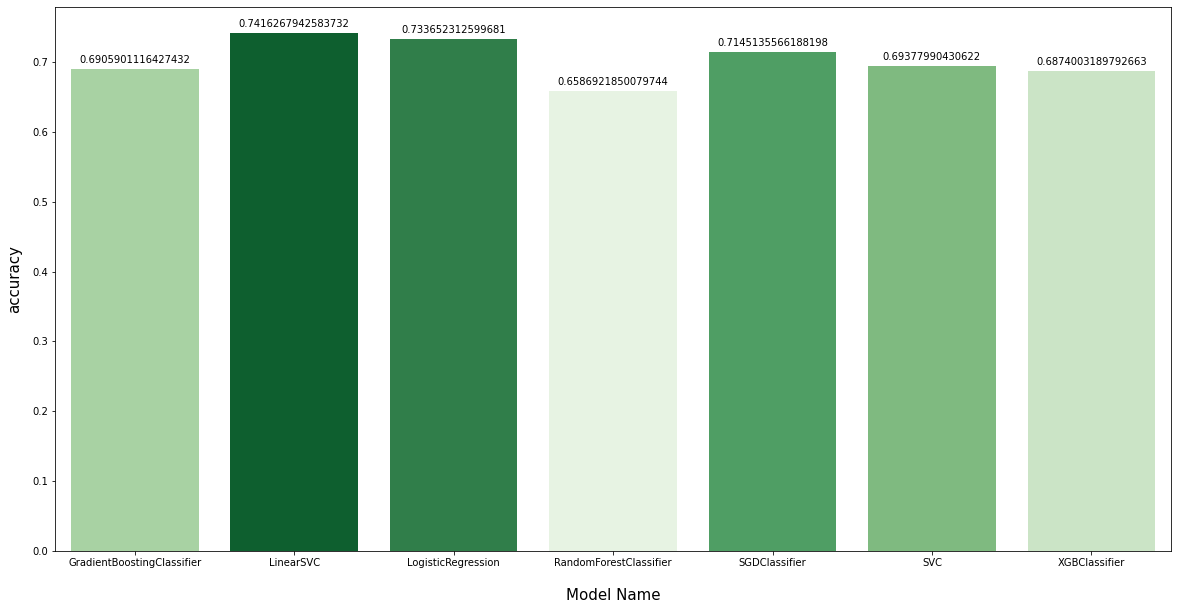

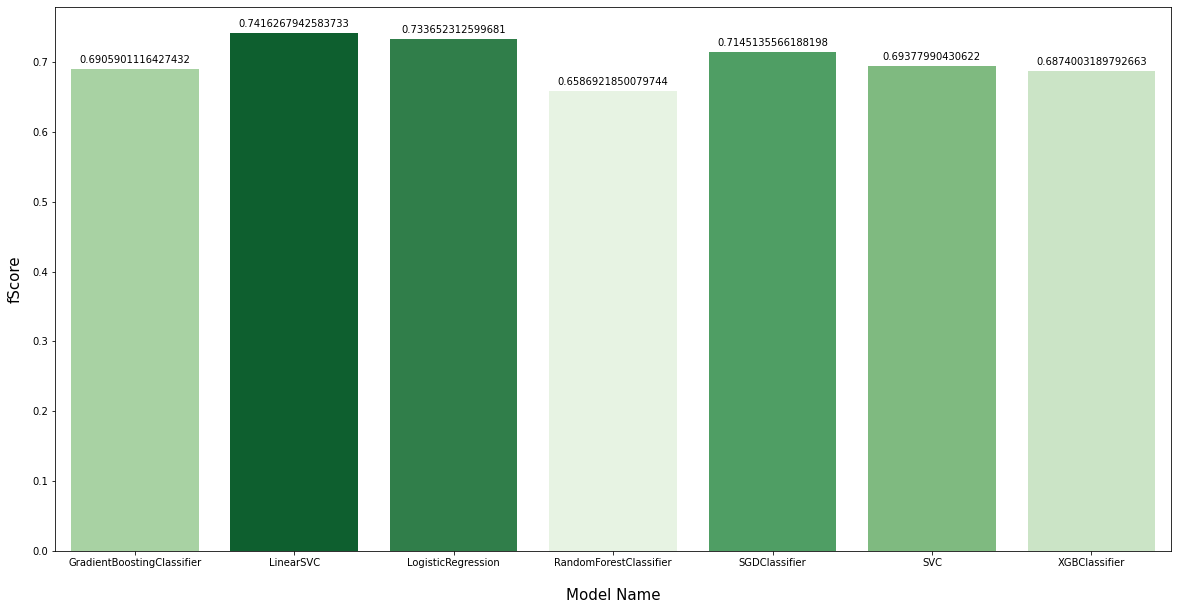

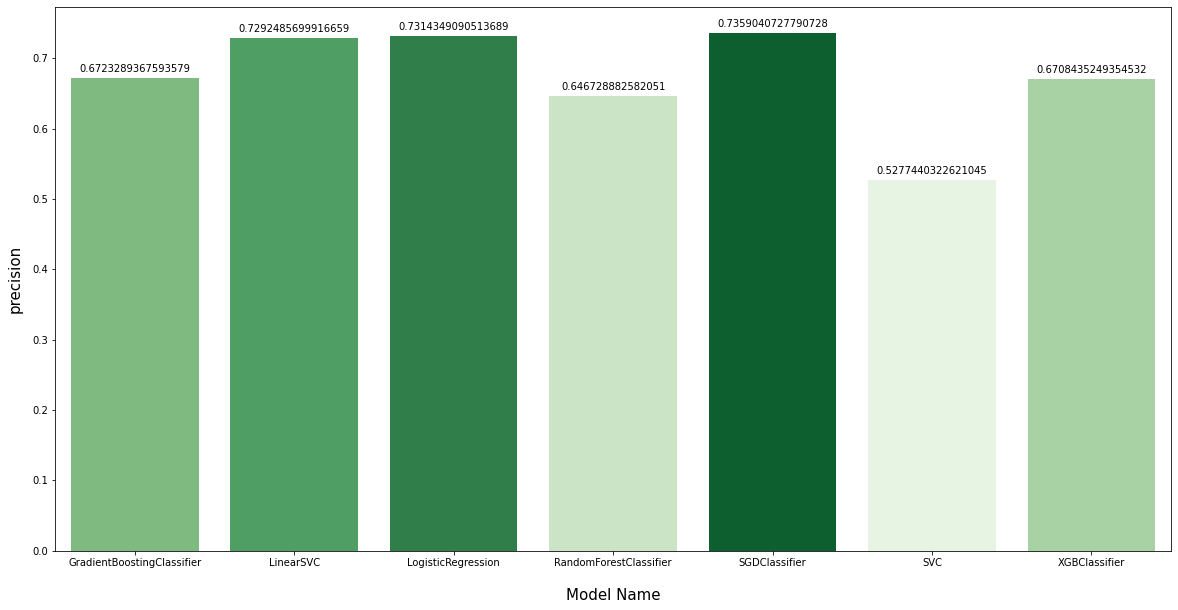

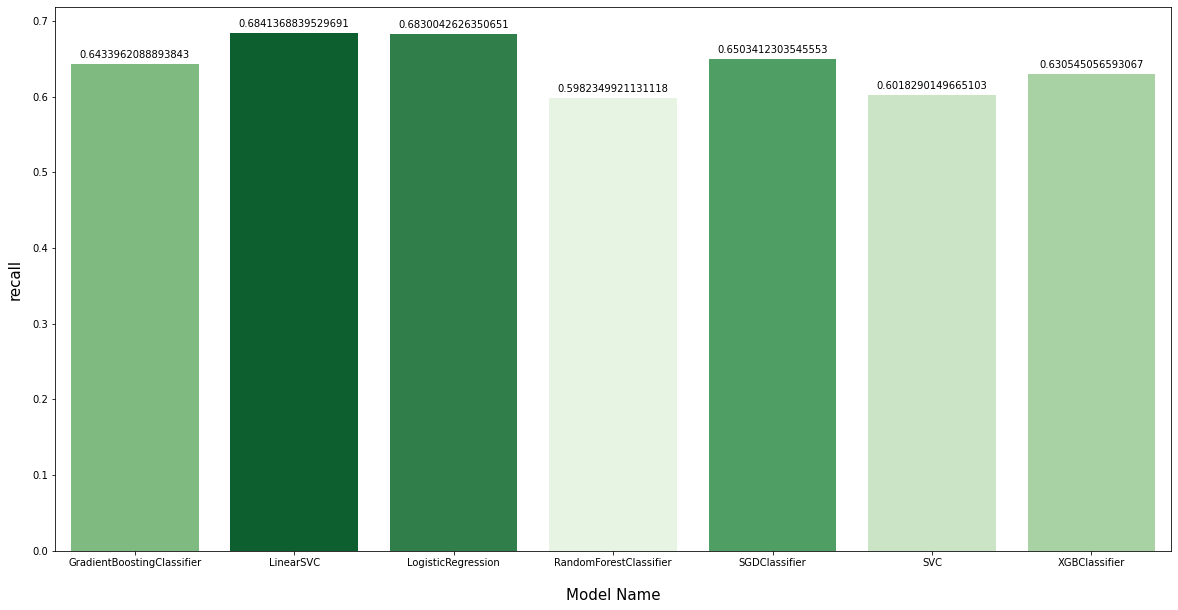

In [ ]:
modelMetricDfT = modelMetricDf.T
plt.rcParams["figure.figsize"] = (20,10)
for col in modelMetricDfT.columns:
  dfM = modelMetricDfT[col]
  dfM = dfM.reset_index()
  dataF = dfM.groupby("index").sum()
  data = dataF[col]
  rank = data.values.argsort().argsort() 

  pal = sns.color_palette("Greens_r", len(data))
  g = sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
  
  for p in g.patches:
        g.annotate((p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
  
  g.set_ylabel(col, fontsize=15, labelpad= 10)
  g.set_xlabel("Model Name", fontsize=15, labelpad= 20)
  plt.show()


  print()
  print()

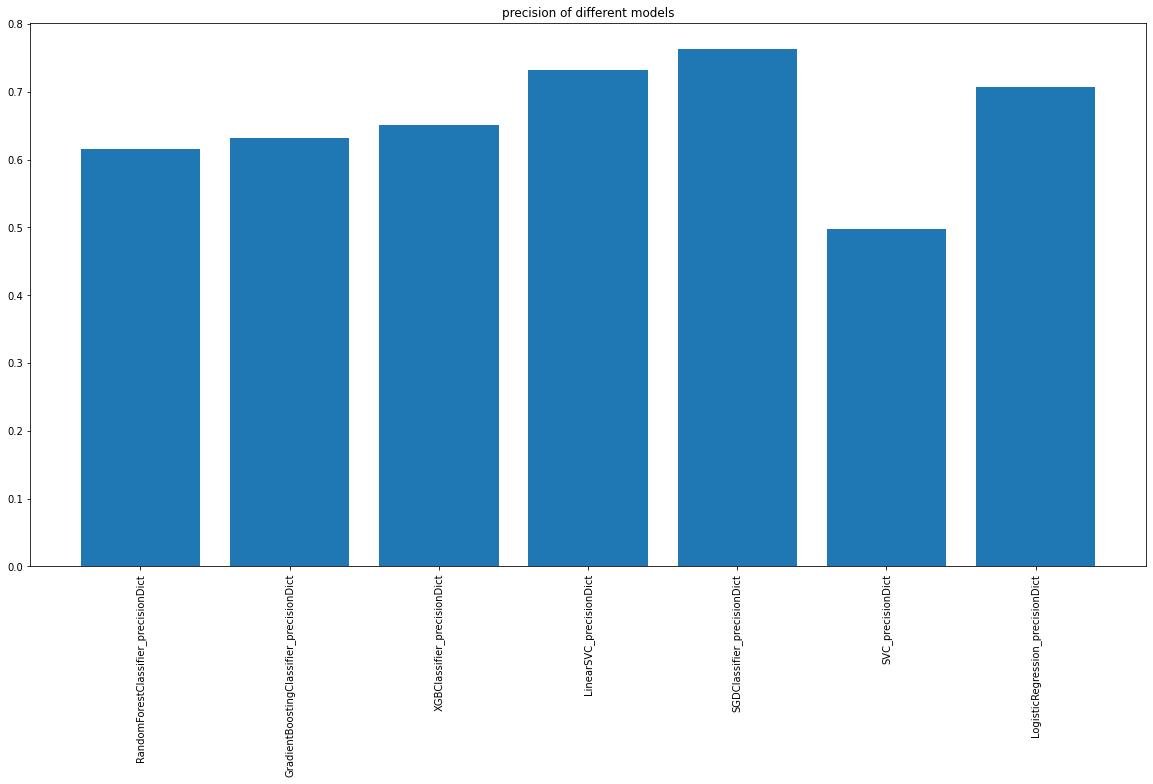

In [ ]:
plt.bar(range(len(precisionDict)), list(precisionDict.values()), align='center')
plt.xticks(range(len(precisionDict)), list(precisionDict.keys()), rotation = 90)
plt.title("precision of different models")
plt.show()

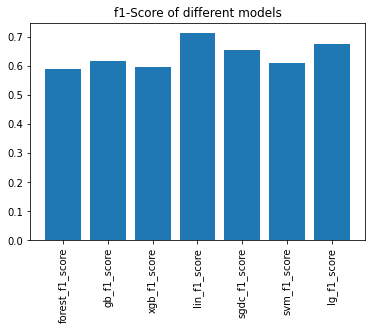

In [ ]:
plt.bar(range(len(fScoreDict)), list(fScoreDict.values()), align='center')
plt.xticks(range(len(fScoreDict)), list(fScoreDict.keys()), rotation = 90)
plt.title("f1-Score of different models")
plt.show()

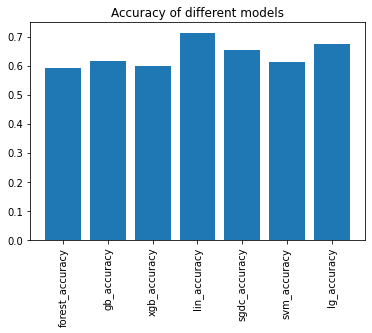

In [ ]:
plt.bar(range(len(accuracyDict)), list(accuracyDict.values()), align='center')
plt.xticks(range(len(accuracyDict)), list(accuracyDict.keys()), rotation = 90)
plt.title("Accuracy of different models")
plt.show()

## Cross Validation

In [ ]:
import xgboost as xgb
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier(),
    SGDClassifier(),
    SVC(),
    LinearSVC(),
    LogisticRegression()
    ,
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df

model_name  fold_idx  accuracy
0       RandomForestClassifier         0  0.628743
1       RandomForestClassifier         1  0.632735
2       RandomForestClassifier         2  0.664671
3       RandomForestClassifier         3  0.644711
4       RandomForestClassifier         4  0.658683
5   GradientBoostingClassifier         0  0.664671
6   GradientBoostingClassifier         1  0.684631
7   GradientBoostingClassifier         2  0.678643
8   GradientBoostingClassifier         3  0.678643
9   GradientBoostingClassifier         4  0.690619
10               XGBClassifier         0  0.664671
11               XGBClassifier         1  0.680639
12               XGBClassifier         2  0.672655
13               XGBClassifier         3  0.668663
14               XGBClassifier         4  0.696607
15               SGDClassifier         0  0.700599
16               SGDClassifier         1  0.692615
17               SGDClassifier         2  0.706587
18               SGDClassifier         3  0.702595
19               SGDClassifier         4  0.712575
20                         SVC         0  0.668663
21                         SVC         1  0.646707
22                         SVC         2  0.664671
23                         SVC         3  0.660679
24                         SVC         4  0.666667
25                   LinearSVC         0  0.728543
26                   LinearSVC         1  0.724551
27                   LinearSVC         2  0.726547
28                   LinearSVC         3  0.728543
29                   LinearSVC         4  0.744511
30          LogisticRegression         0  0.712575
31          LogisticRegression         1  0.720559
32          LogisticRegression         2  0.708583
33          LogisticRegression         3  0.704591
34          LogisticRegression         4  0.716567

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Mean Accuracy  Standard deviation
model_name                                                   
GradientBoostingClassifier       0.679441            0.009635
LinearSVC                        0.730539            0.007984
LogisticRegression               0.712575            0.006312
RandomForestClassifier           0.645908            0.015691
SGDClassifier                    0.702994            0.007388
SVC                              0.661477            0.008769
XGBClassifier                    0.676647            0.012624

## Box-Plot

In [ ]:
## Please update the code to show the order of the models from #1 Random first to #7 Logistic Regression

Text(0.5, 1.0, 'MEAN ACCURACY (cv = 5)\n')

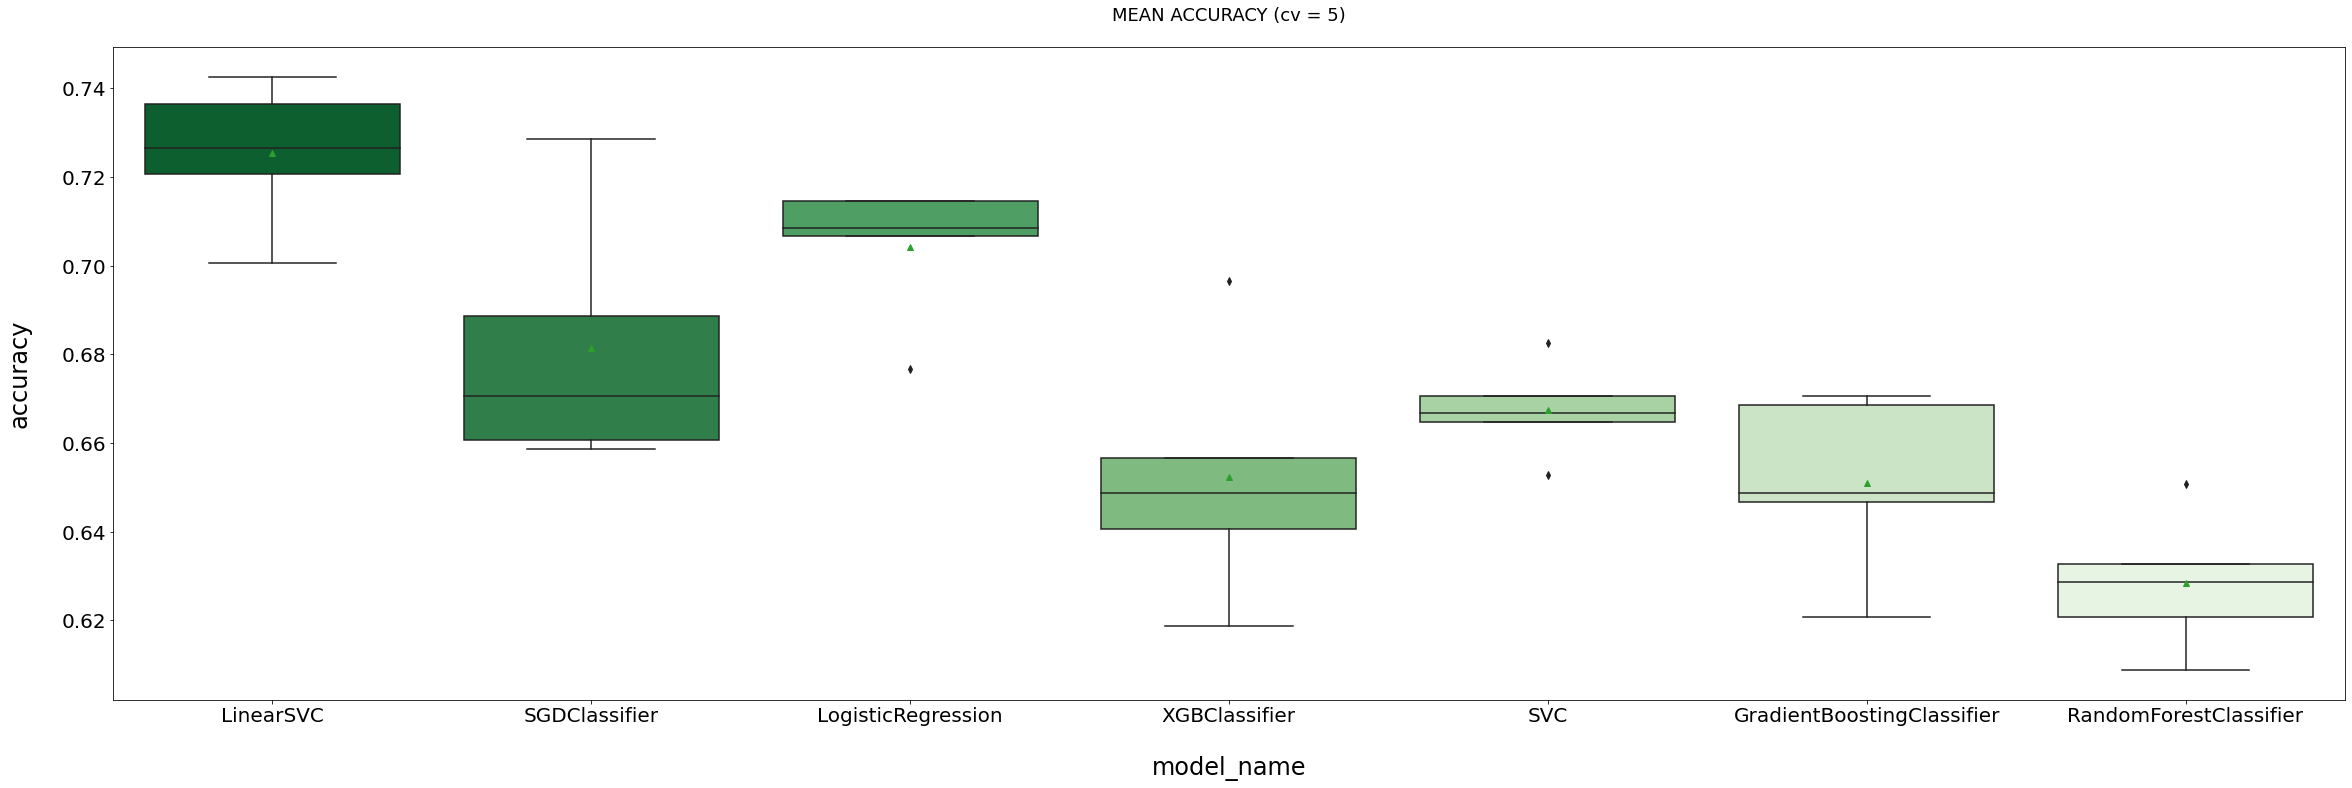

In [ ]:
# Acc = acc.iloc[:,:-1]
fig, axs = plt.subplots(figsize=(40,12))

accT = cv_df
accT.index = list(accT.model_name.values)

accT = accT.sort_values(by = 'accuracy', ascending=False)
# now applying the sorted indices to the data
# df_sorted = accT[index_sort]
  
  
# plotting the boxplot for the data 
sns.boxplot(x='model_name', y='accuracy', data = accT, 
            showmeans=True, palette="Greens_r")

axs.set_xlabel("model_name", fontsize=24, labelpad= 30)
axs.set_ylabel("accuracy", fontsize=24, labelpad= 30)
axs.tick_params(axis='y', labelsize=20)
axs.tick_params(axis='x', labelsize=20)

plt.title("MEAN ACCURACY (cv = 5)\n", size=18)

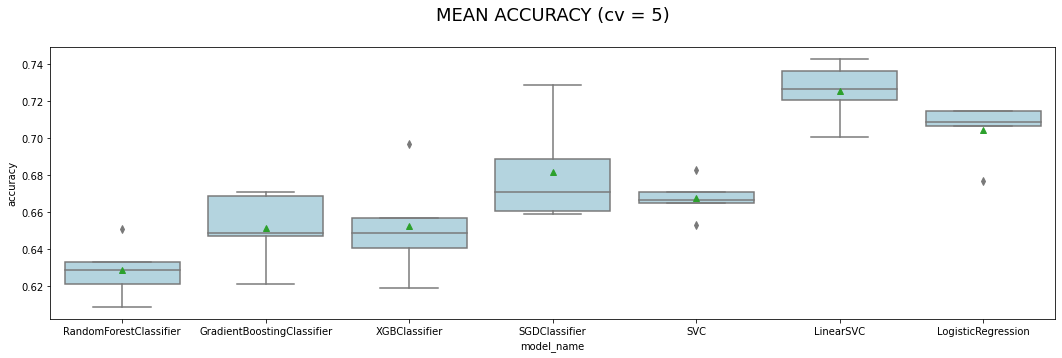

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=18);

## AUC-ROC Curve

In [ ]:
! pip install scikit-plot

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

def plotROCAUCDiagonal(model,X_test, y_test, ind):
  labels = [0, 1, 2, 3]
  pred = model.predict(X_test)
  ypredsBin = label_binarize(pred, classes=labels)
  ytestBin = label_binarize(y_test, classes=labels)

  rocScore = roc_auc_score(ytestBin, ypredsBin,average='macro',multi_class='ovo')
  print(f"ROC-AUC Score for {modelListName[ind]} is: ", rocScore)

  pred_prob = model.predict_proba(X_test)
  skplt.metrics.plot_roc_curve(y_test, pred_prob,)
  plt.show()

ROC-AUC Score for LogisticRegression is:  0.7804298025734471


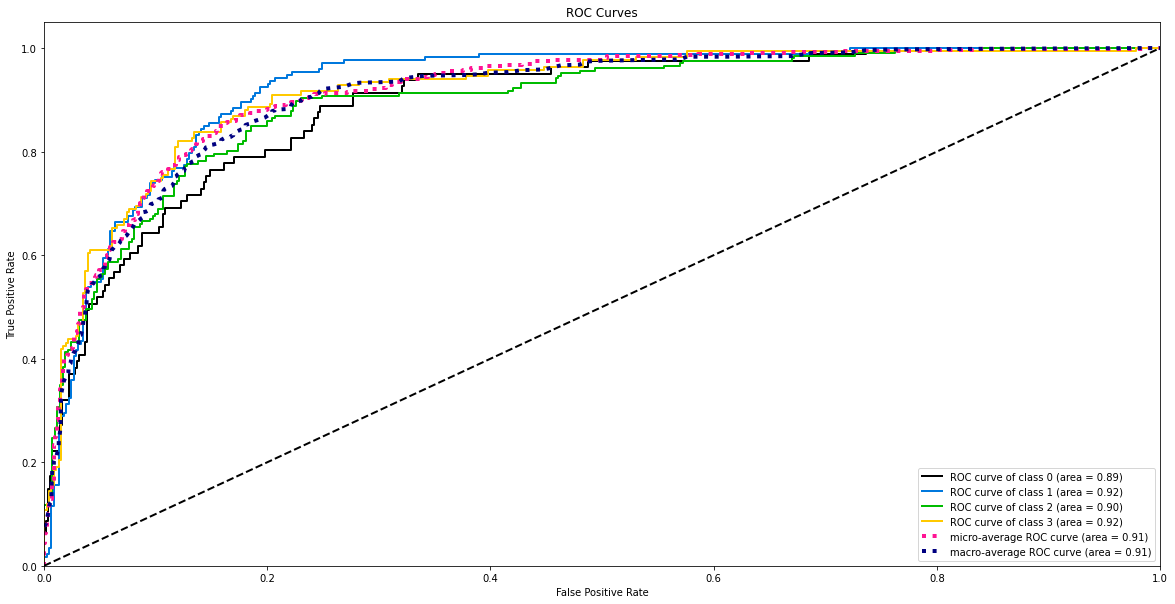

In [ ]:
plotROCAUCDiagonal(lg, X_test, y_test,6)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

def plotROCAUC(model,X_test, y_test, ind):
  labels = [0, 1, 2, 3]
  pred = model.predict(X_test)
  ypredsBin = label_binarize(pred, classes=labels)
  ytestBin = label_binarize(y_test, classes=labels)

  rocScore = roc_auc_score(ytestBin, ypredsBin,average='macro',multi_class='ovo')
  print(f"ROC-AUC Score for {modelListName[ind]} is: ", rocScore)

  pred_prob = model.predict_proba(X_test)

  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
  # print(fpr)
  # plotting    ['Catastrophic', 'Hazardous', 'Minimal', 'Minor', 'Minor '] 
  plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Catastrophic')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='salmon', label='Hazardous')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='green', label='Minimal')
  plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Minor')
  # plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Minor')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate', fontsize=24, labelpad= 30)
  plt.ylabel('True Positive rate', fontsize=24, labelpad= 30)
  plt.title(f"ROC-AUC Curve for {modelListName[ind]} model",size = 24)
  plt.legend(loc='best')
  # plt.savefig('Multiclass ROC',dpi=300)

## ROC Inferences

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0

The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

The false positive rate is calculated as the number of false positives divided by the sum of the number of false positives and the number of true negatives.

Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.


Generally, skilful models are represented by curves that bow up to the top left of the plot.
A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

Taking in account the above foundatins, the below ROC plots with respect to each category represent the efficiency at which each category had been predicted.

ROC-AUC Score for LogisticRegression is:  0.7667992167148241


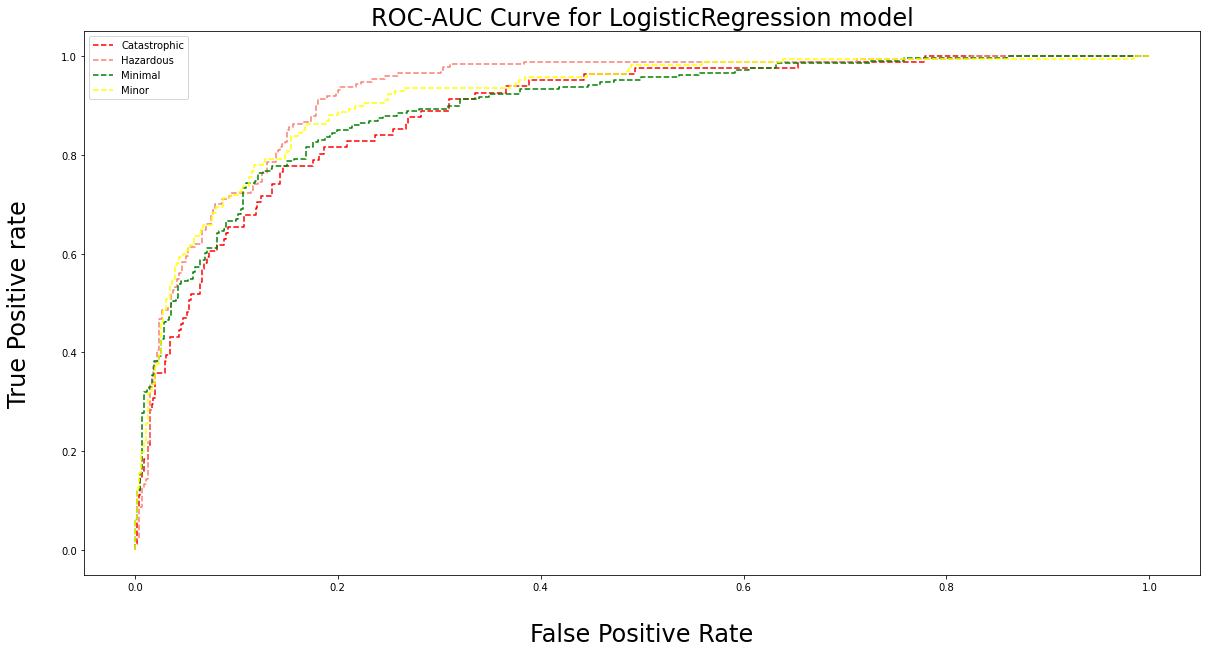

In [ ]:
plotROCAUC(lg, X_test, y_test,6)

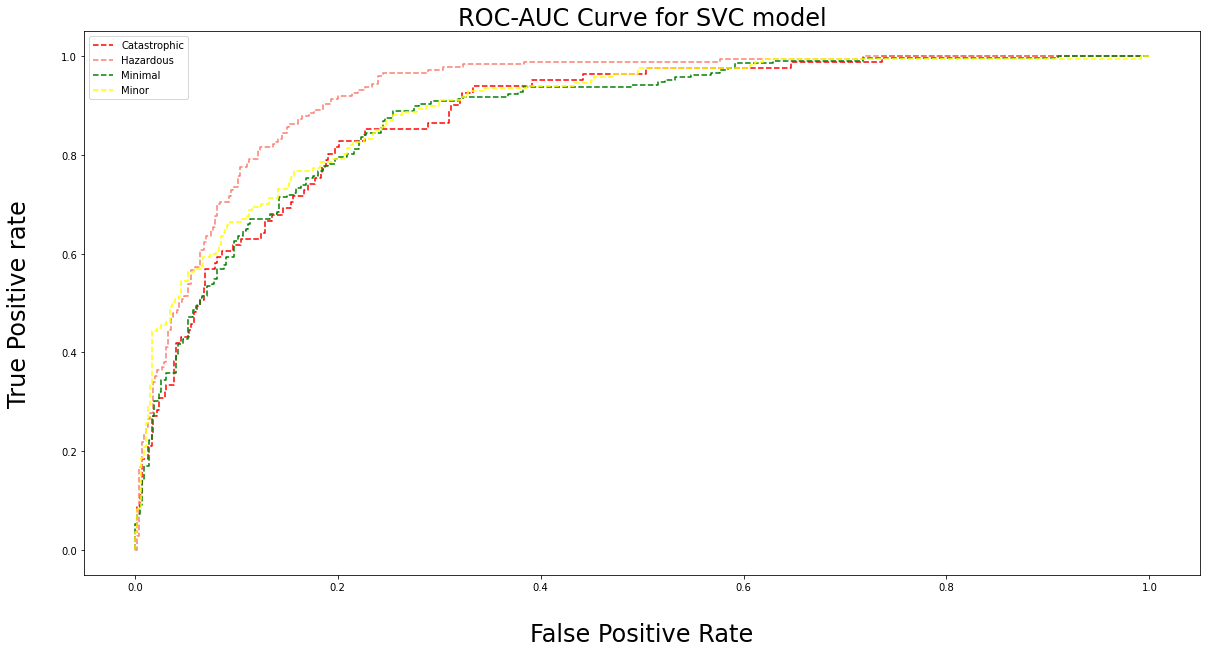

In [ ]:
plotROCAUC(svm, X_test, y_test,5)

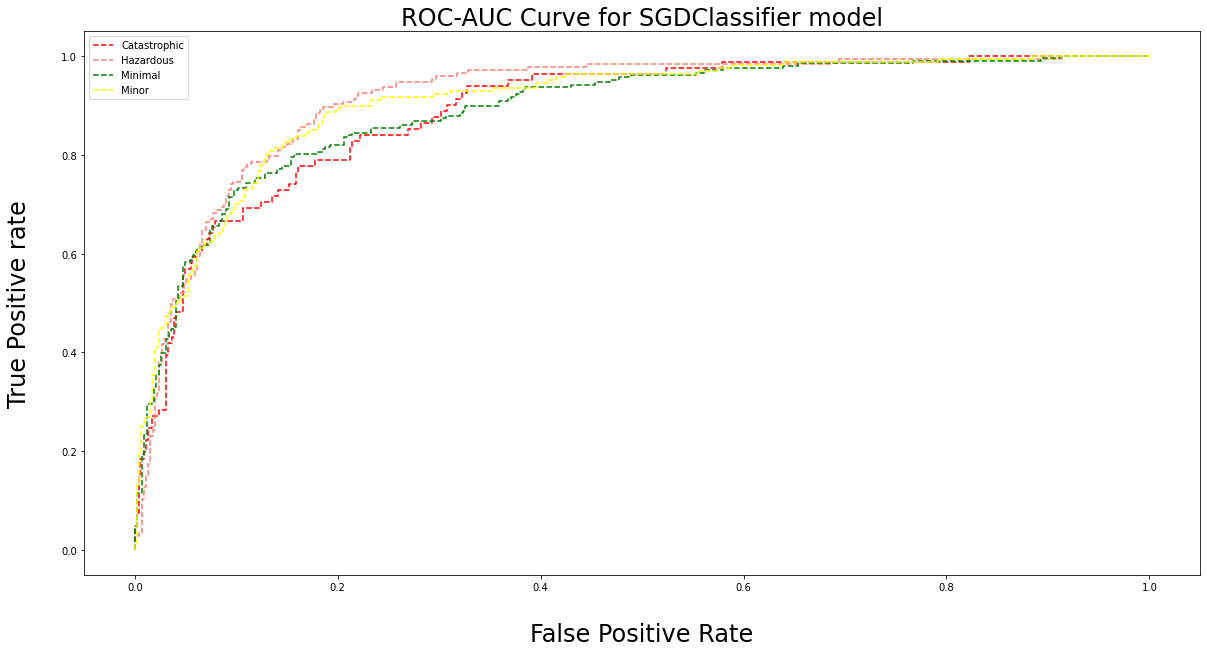

In [ ]:
plotROCAUC(calibratorsgdc, X_test, y_test,4)

In [ ]:
# plotROCAUC(lin, X_test, y_test,3)

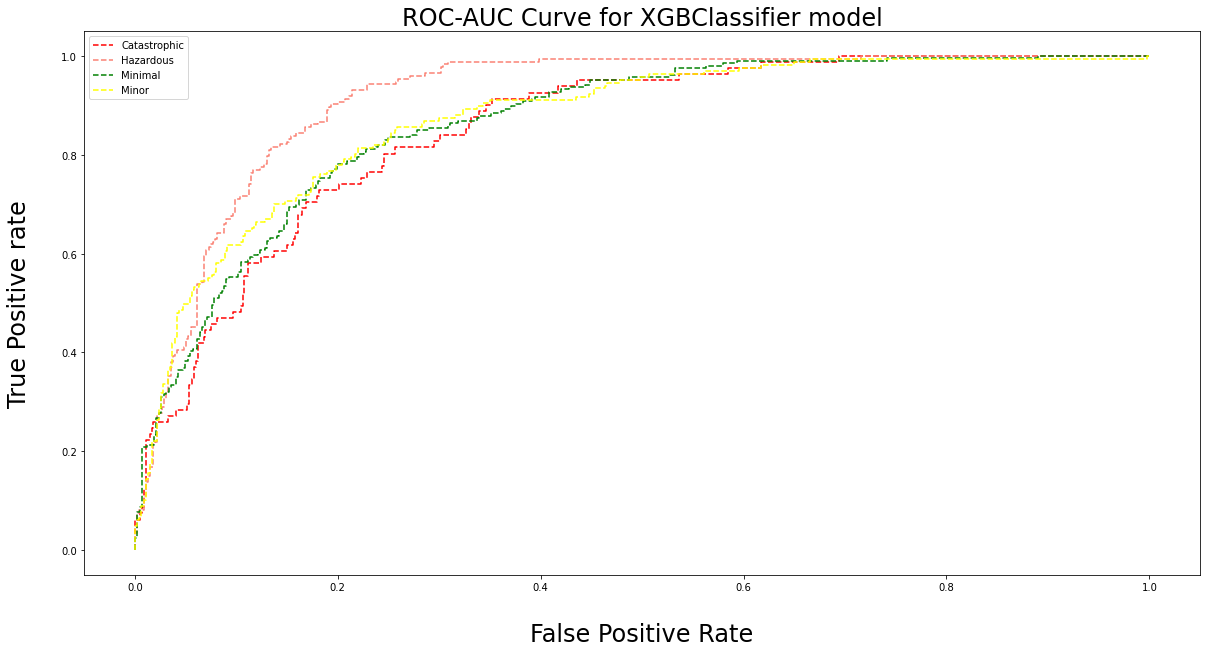

In [ ]:
plotROCAUC(xgb, X_test, y_test,2)

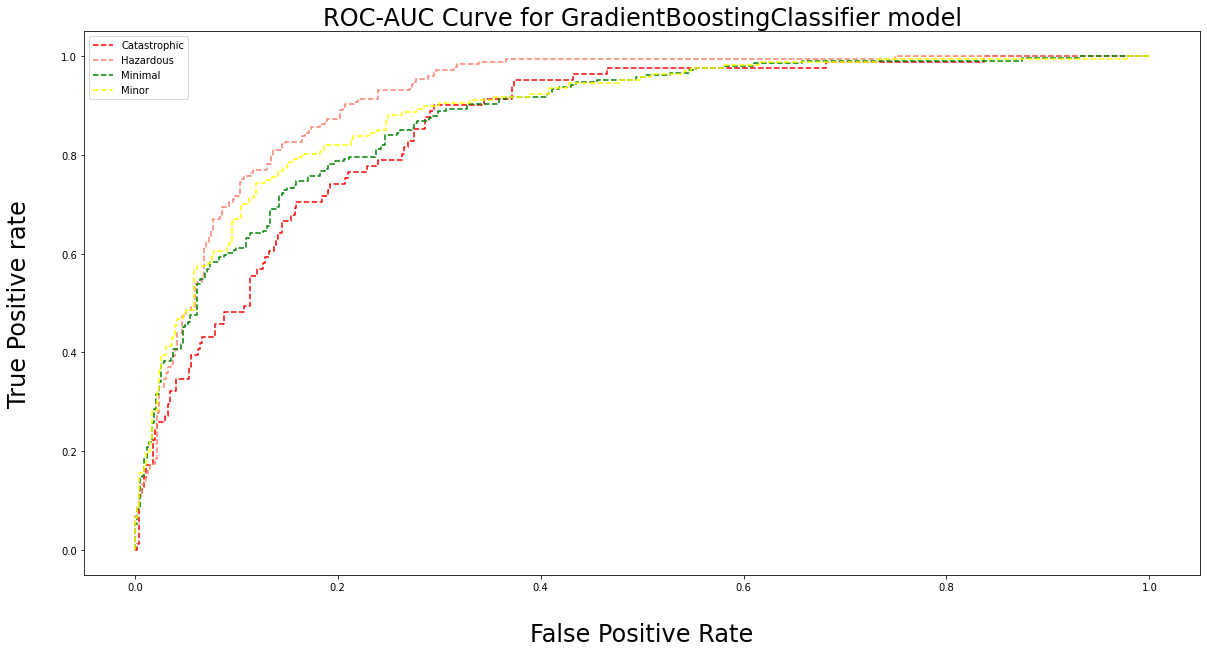

In [ ]:
plotROCAUC(gb, X_test, y_test,1)

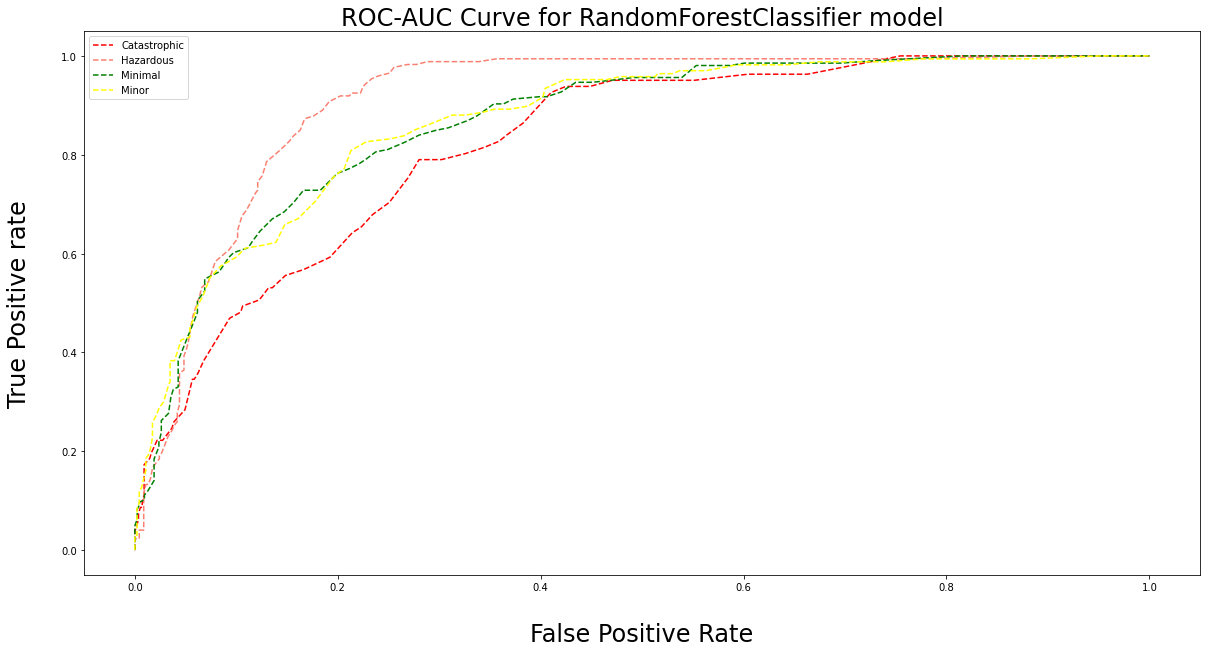

In [ ]:
plotROCAUC(forest, X_test, y_test,0)

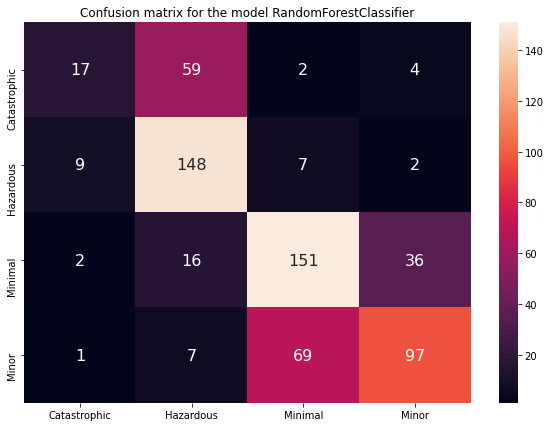

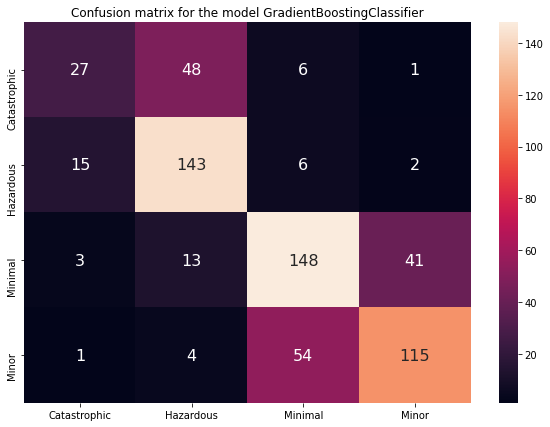

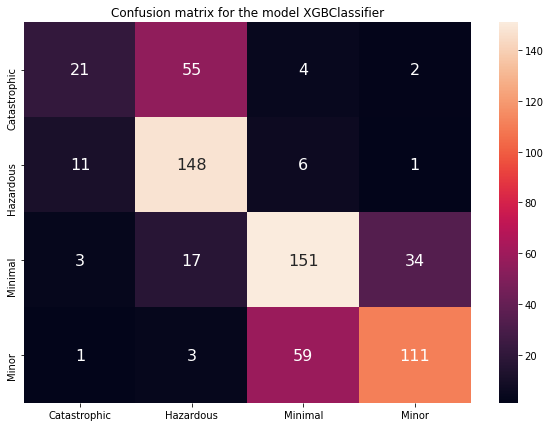

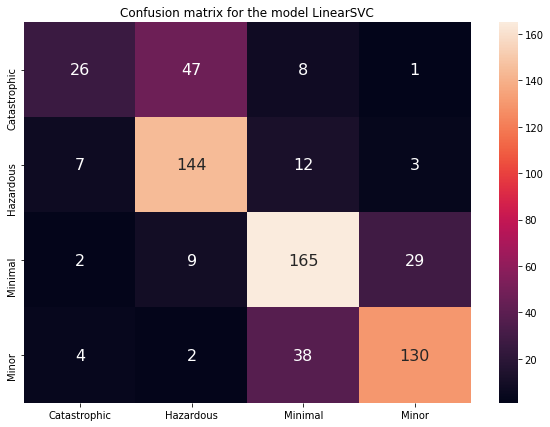

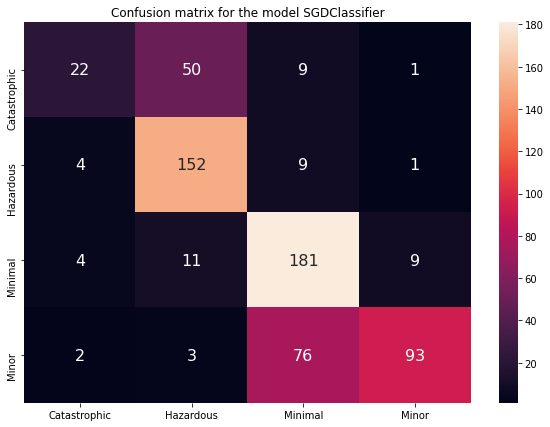

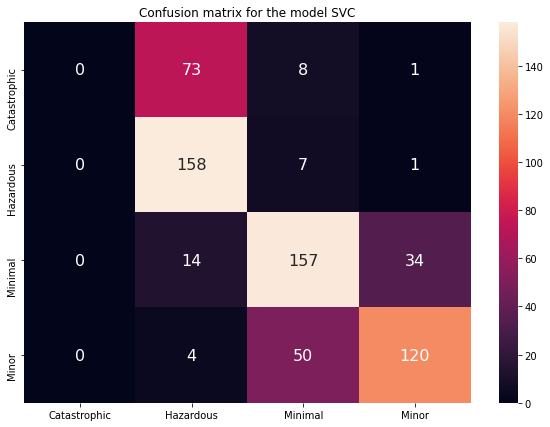

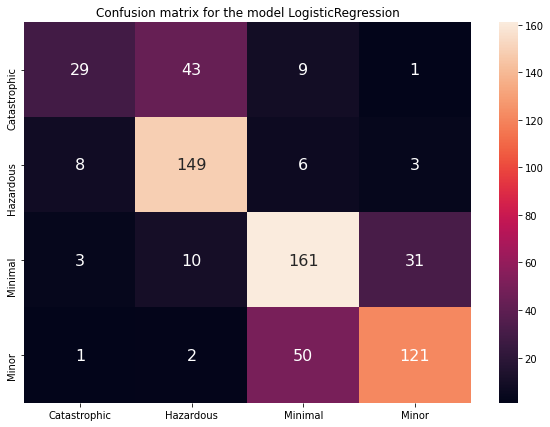

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
for ind, model in enumerate(modelList):
  y_pred = model.predict(X_test)
  matrix = metrics.confusion_matrix(y_test, y_pred)

  l = ['Catastrophic', 'Hazardous', 'Minimal', 'Minor']
  df_cm = pd.DataFrame(matrix, index = [i for i in "ABCD"],
                    columns = [i for i in "ABCD"])
  plt.figure(figsize = (10,7))
  plt.title(f"Confusion matrix for the model {modelListName[ind]}")
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=l, yticklabels=l, fmt='g')

In [ ]:

# from sklearn.metrics import plot_confusion_matrix
# for ind, model in enumerate(modelList):
#   plot_confusion_matrix(model, X_test, y_test,cmap = "Blues",display_labels=['Catastrophic', 'Hazardous', 'Minimal', 'Minor', 'Minor '])  
#   plt.title(f"Confusion matrix for the model {modelListName[ind]}")
#   plt.show() 

## Lift Curve

# MACHINE LEARNING EXPERIMENTATION - Hyperparameter Tunning                "GRID SEARCH"

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
model_df['label_values'] = le.fit_transform(model_df.label.values)
X = model_df.drop(['label_values','label'],axis = 1)
y = model_df['label_values']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y, test_size = 0.2, random_state = 42, stratify = y)

### #1 Random Forest

In [ ]:
# ! pip install hyperopt

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 700}


In [ ]:
#Random Forest Classifier with Grid Search
forest = RandomForestClassifier(max_features= 'sqrt', n_estimators= 700)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 68.262%
Test Set F1 Score: 0.683


### #2 Gradient Boosting

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [ ]:
gb = GradientBoostingClassifier()

CV_gb = RandomizedSearchCV(estimator=gb, param_distributions=parameters, cv= 5)
CV_gb.fit(X_train, y_train)
print(CV_gb.best_params_)

{'subsample': 1.0, 'n_estimators': 10, 'min_samples_split': 0.31818181818181823, 'min_samples_leaf': 0.2090909090909091, 'max_features': 'log2', 'max_depth': 8, 'loss': 'deviance', 'learning_rate': 0.05, 'criterion': 'friedman_mse'}


In [ ]:

gb = GradientBoostingClassifier(subsample = 1.0, n_estimators =  10, min_samples_split = 0.31818181818181823, min_samples_leaf = 0.2090909090909091, 
 max_features= 'log2', max_depth= 8, loss = 'deviance', learning_rate = 0.05, criterion= 'friedman_mse')

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 52.472%
Test Set F1 Score: 0.525


### #3 XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()
search_space = [
  {
    'clf__n_estimators': [50, 100, 150, 200],
    'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'clf__max_depth': range(3, 10),
    'clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
  }
]
grid = GridSearchCV(
  xgb,
  param_grid=search_space,
  cv=5,
  scoring="accuracy",
  refit='AUC',
  verbose=1,
  n_jobs=-1
)
# Fit grid search
model = grid.fit(X_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 49.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 87.6min


In [ ]:
grid.best_params_

{'clf__colsample_bytree': 0.1,
 'clf__learning_rate': 0.01,
 'clf__max_depth': 3,
 'clf__n_estimators': 50}

In [ ]:
# xgb with Grid Search
import xgboost as xgb
xgb = xgb.XGBClassifier(clf__colsample_bytree= 0.1,
 clf__learning_rate= 0.01,
 clf__max_depth= 3,
 clf__n_estimators= 50)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 68.740%
Test Set F1 Score: 0.687


###  #4 Linear SVC

In [ ]:
param_grid = {'C': [0.1,1, 10, 100],'multi_class':['ovr', 'crammer_singer']}
grid = GridSearchCV(LinearSVC(),param_grid = param_grid,refit=True,verbose=2)
grid.fit(X_train, y_train)

In [ ]:
print('Best Params: ', grid.best_params_) 

Best Params:  {'C': 100, 'multi_class': 'crammer_singer'}


In [ ]:
# linerar SVC with GRID SEARCH RESULTS
lin = LinearSVC(C=  100, multi_class = 'crammer_singer')
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 83.254%
Test Set F1 Score: 0.833


### #5 SGDC

In [ ]:
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["none", "l1", "l2"]}

sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=45) 
random = GridSearchCV(estimator=sgd, 
param_grid=param_grid) 
random_result = random.fit(X_train, y_train) 

In [ ]:
print('Best Params: ', random_result.best_params_) 

Best Params:  {'alpha': 0.0001, 'penalty': 'none'}


In [ ]:
# SGDC  with GRID SEARCH RESULTS
sgdc = SGDClassifier(max_iter=45 ,alpha =  0.0001, class_weight =  {1: 0.7, 0: 0.3}, eta0 = 1, learning_rate = 'adaptive', loss =  'log', penalty =  'none' ) 
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 71.292%
Test Set F1 Score: 0.713


### #6 SVC 

In [ ]:
# repeated above

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(probability=True),param_grid = param_grid,refit=True)
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# linerar SVC with Grid Search
from sklearn.svm import SVC
svm = SVC(probability=True,C = 1000, gamma = 0.01, kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 80.223%
Test Set F1 Score: 0.802


### #7 logistic Regression

In [ ]:
# LogisticRegression with Grid Search
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 73.365%
Test Set F1 Score: 0.734


## All ML Models Accuracy, F1 Score, Recall, Precision

In [ ]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

modelList = [forest, gb, xgb, lin, sgdc, svm, lg]
modelListName = ['RandomForestClassifier', "GradientBoostingClassifier", "XGBClassifier", "LinearSVC", "SGDClassifier", "SVC", "LogisticRegression"]

accuracyDict = {}
fScoreDict = {}
precisionDict = {}
recallDict = {}

for ind, model in enumerate(modelList):
  # model.fit()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = metrics.accuracy_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred, average="micro")
  precision = precision_score(y_test, y_pred, average="macro")
  recall = recall_score(y_test, y_pred, average="macro")

  accuracyDict[f"{modelListName[ind]}_accuracy"] = accuracy
  fScoreDict[f"{modelListName[ind]}_f1_score"] = f1_score
  precisionDict[f"{modelListName[ind]}_precisionDict"] = precision
  recallDict[f"{modelListName[ind]}_recallDict"] = recall
  
  # print(f"Test Set Accuracy: {accuracy*100:.3f}%")
  # print(f"Test Set F1 Score: {f1_score:.3f}")
  # break

# print(accuracyDict)

In [ ]:
accuracyDf = pd.DataFrame.from_dict(accuracyDict, orient='index', columns=["accuracy"]).reset_index()
accuracyDf['index'] = accuracyDf['index'].apply(lambda x: x.split("_")[0])
fScoreDf = pd.DataFrame.from_dict(fScoreDict, orient='index', columns=["fScore"]).reset_index()
fScoreDf['index'] = fScoreDf['index'].apply(lambda x: x.split("_")[0])
precisionDf = pd.DataFrame.from_dict(precisionDict, orient='index', columns=["precision"]).reset_index()
precisionDf['index'] = precisionDf['index'].apply(lambda x: x.split("_")[0])
recallDf = pd.DataFrame.from_dict(recallDict, orient='index', columns=["recall"]).reset_index()
recallDf['index'] = recallDf['index'].apply(lambda x: x.split("_")[0])
# accuracyDf
modelMetricDf = pd.concat([accuracyDf, fScoreDf['fScore'], precisionDf['precision'], recallDf['recall']], axis = 1).T
modelMetricDf.columns = modelMetricDf.loc['index',:]
modelMetricDf = modelMetricDf.iloc[1:,:]
modelMetricDf

index     RandomForestClassifier  ... LogisticRegression
accuracy                0.668262  ...           0.733652
fScore                  0.668262  ...           0.733652
precision               0.658736  ...           0.731435
recall                  0.596957  ...           0.683004

[4 rows x 7 columns]

In [ ]:
import matplotlib
from matplotlib.pyplot import figure


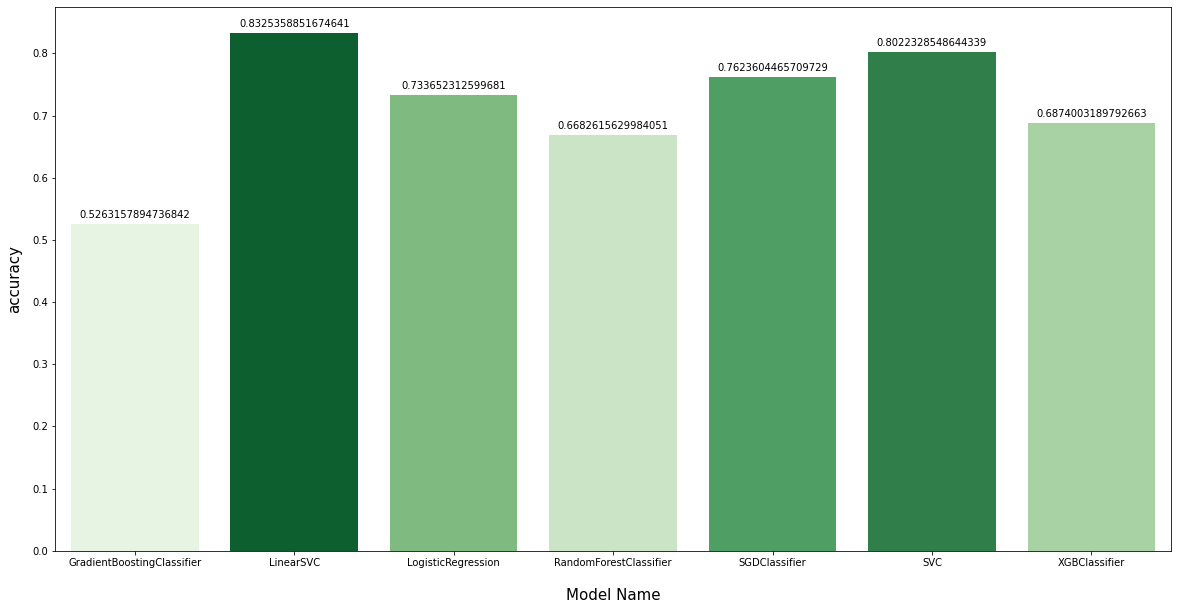

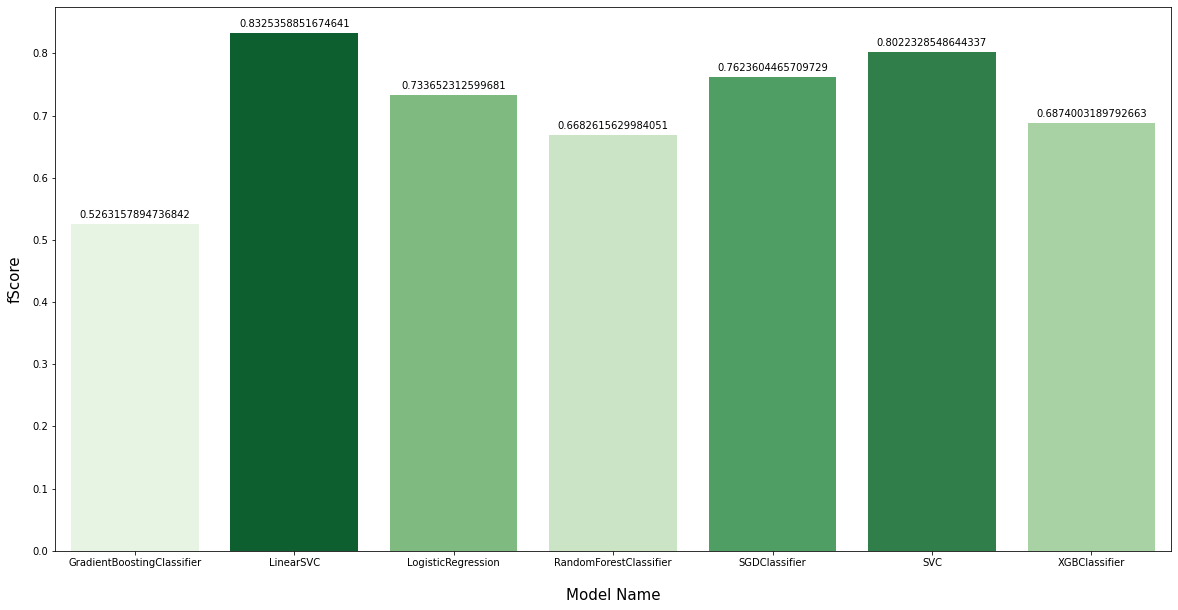

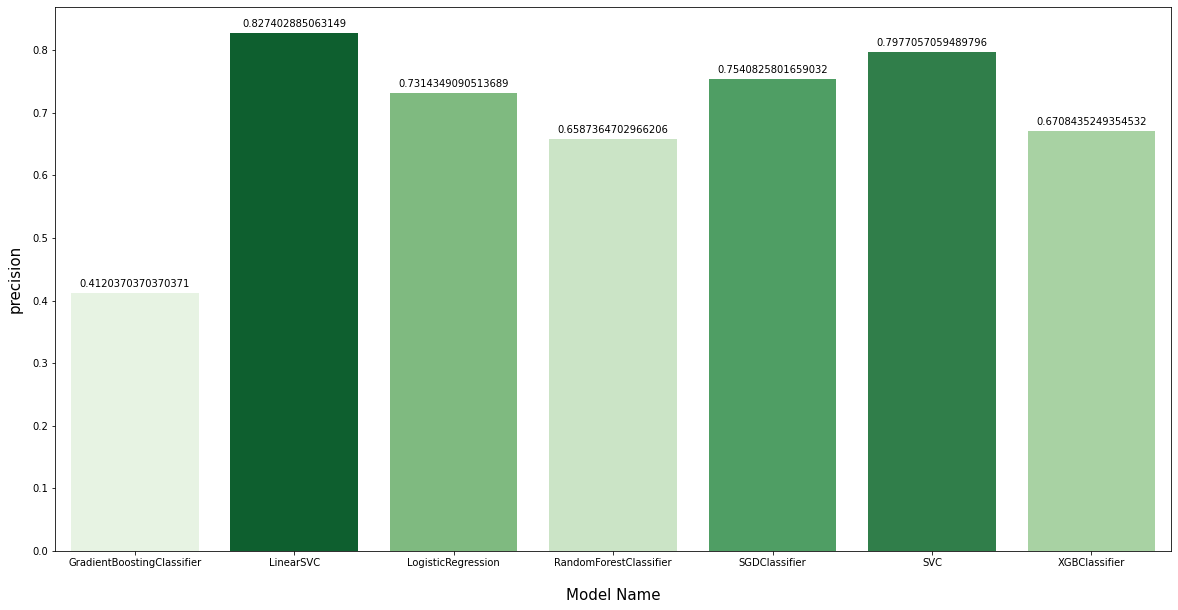

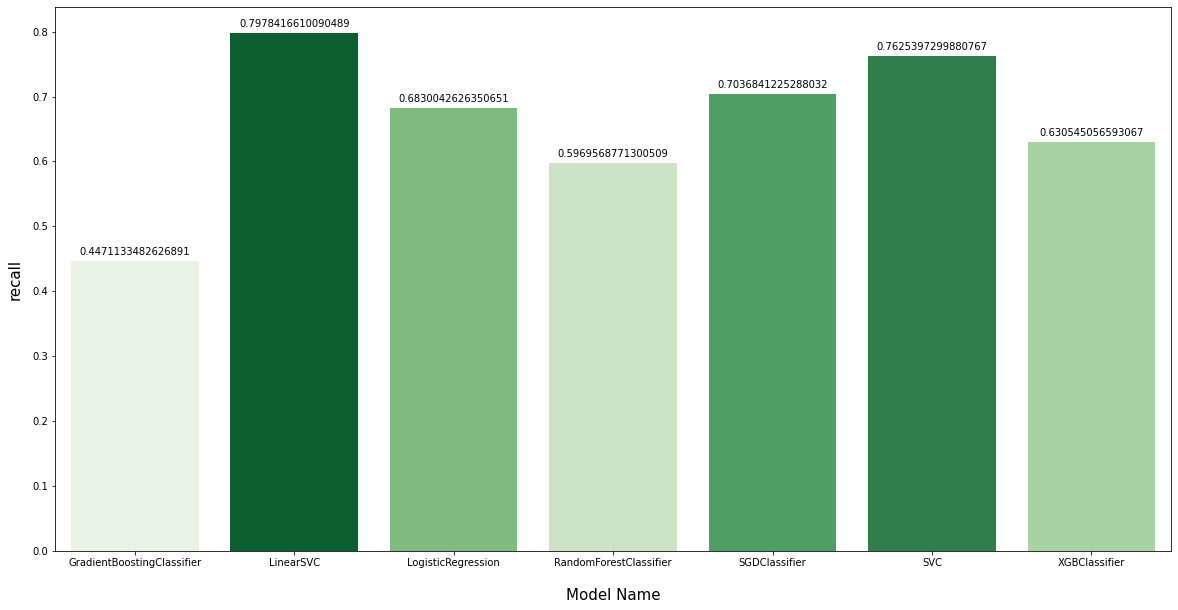

In [ ]:
modelMetricDfT = modelMetricDf.T
plt.rcParams["figure.figsize"] = (20,10)
for col in modelMetricDfT.columns:
  dfM = modelMetricDfT[col]
  dfM = dfM.reset_index()
  dataF = dfM.groupby("index").sum()
  data = dataF[col]
  rank = data.values.argsort().argsort() 

  pal = sns.color_palette("Greens_r", len(data))
  g = sns.barplot(x=data.index, y=data, palette=np.array(pal[::-1])[rank])
  
  for p in g.patches:
        g.annotate((p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
  
  g.set_ylabel(col, fontsize=15, labelpad= 10)
  g.set_xlabel("Model Name", fontsize=15, labelpad= 20)
  plt.show()


  print()
  print()

## Cross Validation

In [ ]:
# import xgboost as xgb
models = [forest, gb, xgb, lin, sgdc, svm, lg]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df

model_name  fold_idx  accuracy
0       RandomForestClassifier         0  0.630739
1       RandomForestClassifier         1  0.634731
2       RandomForestClassifier         2  0.668663
3       RandomForestClassifier         3  0.658683
4       RandomForestClassifier         4  0.664671
5   GradientBoostingClassifier         0  0.510978
6   GradientBoostingClassifier         1  0.524950
7   GradientBoostingClassifier         2  0.552894
8   GradientBoostingClassifier         3  0.536926
9   GradientBoostingClassifier         4  0.532934
10               XGBClassifier         0  0.664671
11               XGBClassifier         1  0.680639
12               XGBClassifier         2  0.672655
13               XGBClassifier         3  0.668663
14               XGBClassifier         4  0.696607
15                   LinearSVC         0  0.804391
16                   LinearSVC         1  0.790419
17                   LinearSVC         2  0.794411
18                   LinearSVC         3  0.786427
19                   LinearSVC         4  0.822355
20               SGDClassifier         0  0.724551
21               SGDClassifier         1  0.710579
22               SGDClassifier         2  0.724551
23               SGDClassifier         3  0.728543
24               SGDClassifier         4  0.734531
25                         SVC         0  0.784431
26                         SVC         1  0.756487
27                         SVC         2  0.766467
28                         SVC         3  0.764471
29                         SVC         4  0.772455
30          LogisticRegression         0  0.712575
31          LogisticRegression         1  0.720559
32          LogisticRegression         2  0.708583
33          LogisticRegression         3  0.704591
34          LogisticRegression         4  0.716567

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Mean Accuracy  Standard deviation
model_name                                                   
GradientBoostingClassifier       0.531737            0.015435
LinearSVC                        0.799601            0.014366
LogisticRegression               0.712575            0.006312
RandomForestClassifier           0.651497            0.017549
SGDClassifier                    0.724551            0.008814
SVC                              0.768862            0.010410
XGBClassifier                    0.676647            0.012624

## Box Plot

In [ ]:
## Please update the code to show the order of the models from #1 Random first to #7 Logistic Regression

Text(0.5, 1.0, 'MEAN ACCURACY (cv = 5)\n')

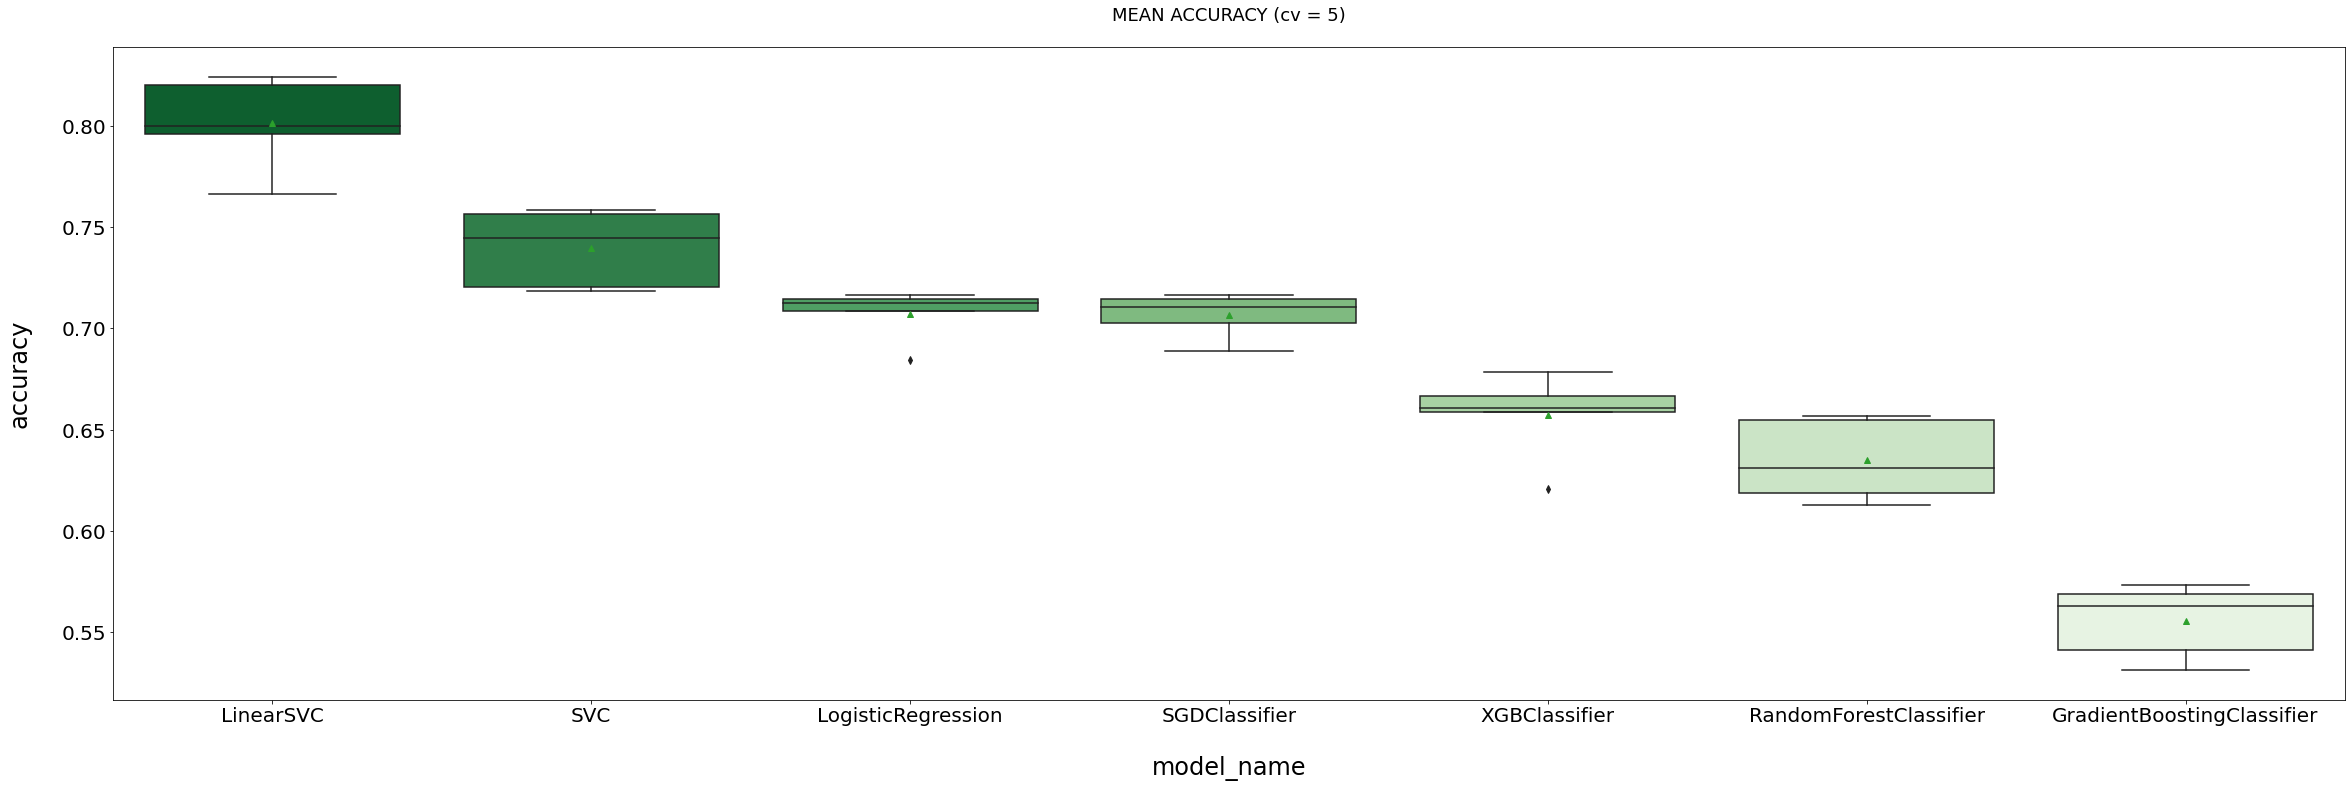

In [ ]:
# Acc = acc.iloc[:,:-1]
fig, axs = plt.subplots(figsize=(40,12))

accT = cv_df
accT.index = list(accT.model_name.values)

accT = accT.sort_values(by = 'accuracy', ascending=False)
# now applying the sorted indices to the data
# df_sorted = accT[index_sort]
  
  
# plotting the boxplot for the data 
sns.boxplot(x='model_name', y='accuracy', data = accT, 
            showmeans=True, palette="Greens_r")

axs.set_xlabel("model_name", fontsize=24, labelpad= 30)
axs.set_ylabel("accuracy", fontsize=24, labelpad= 30)
axs.tick_params(axis='y', labelsize=20)
axs.tick_params(axis='x', labelsize=20)

plt.title("MEAN ACCURACY (cv = 5)\n", size=18)

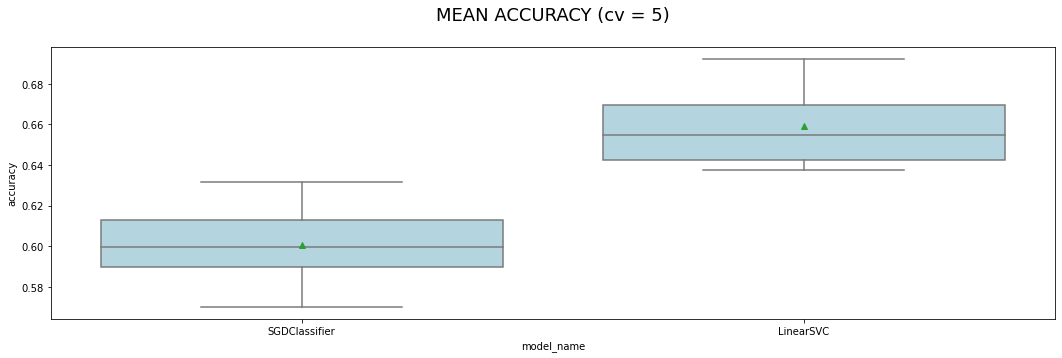

In [ ]:
plt.figure(figsize=(18,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=18);

## AUC-ROC Curve

ROC-AUC Score for LogisticRegression is:  0.7667992167148241


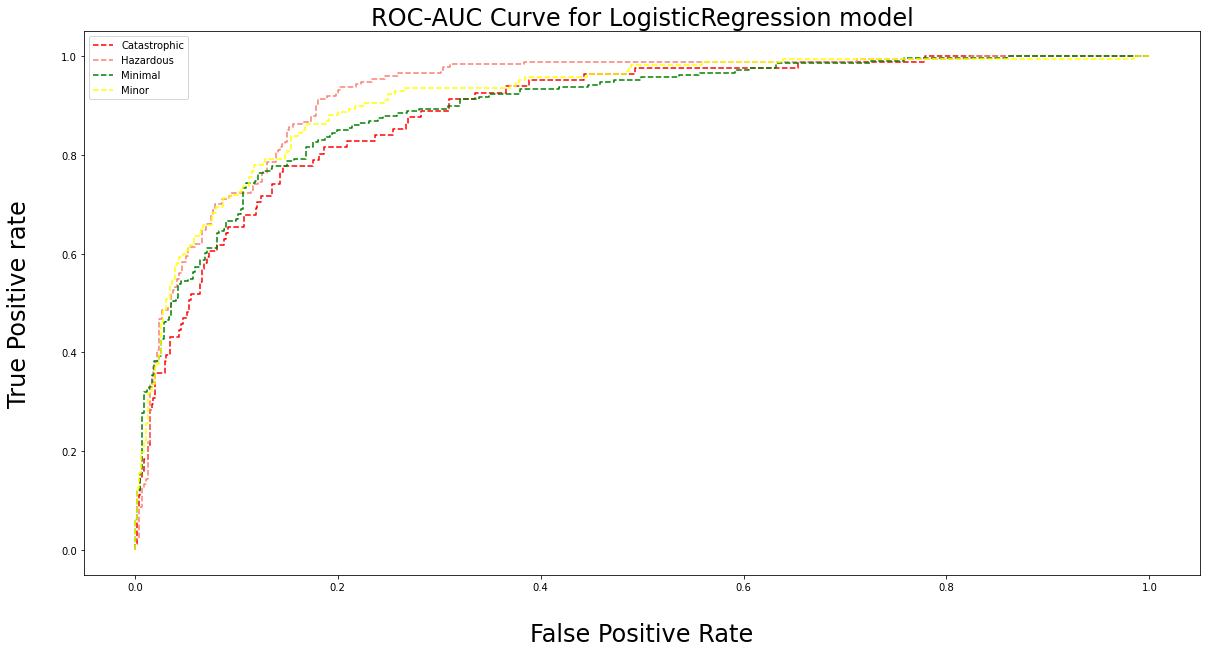

In [ ]:
plotROCAUC(lg, X_test, y_test,6)

ROC-AUC Score for SVC is:  0.8135983055586176


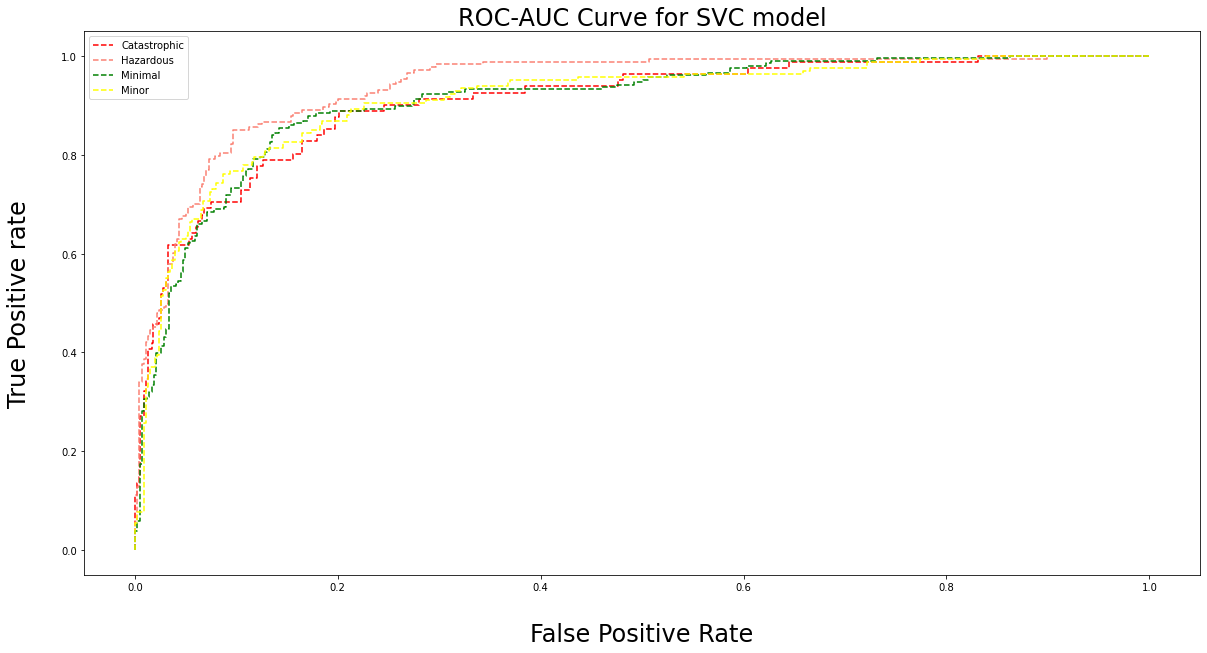

In [ ]:
plotROCAUC(svm, X_test, y_test,5)

In [ ]:
# plotROCAUC(lin, X_test, y_test,3)

ROC-AUC Score for XGBClassifier is:  0.7547347659262299


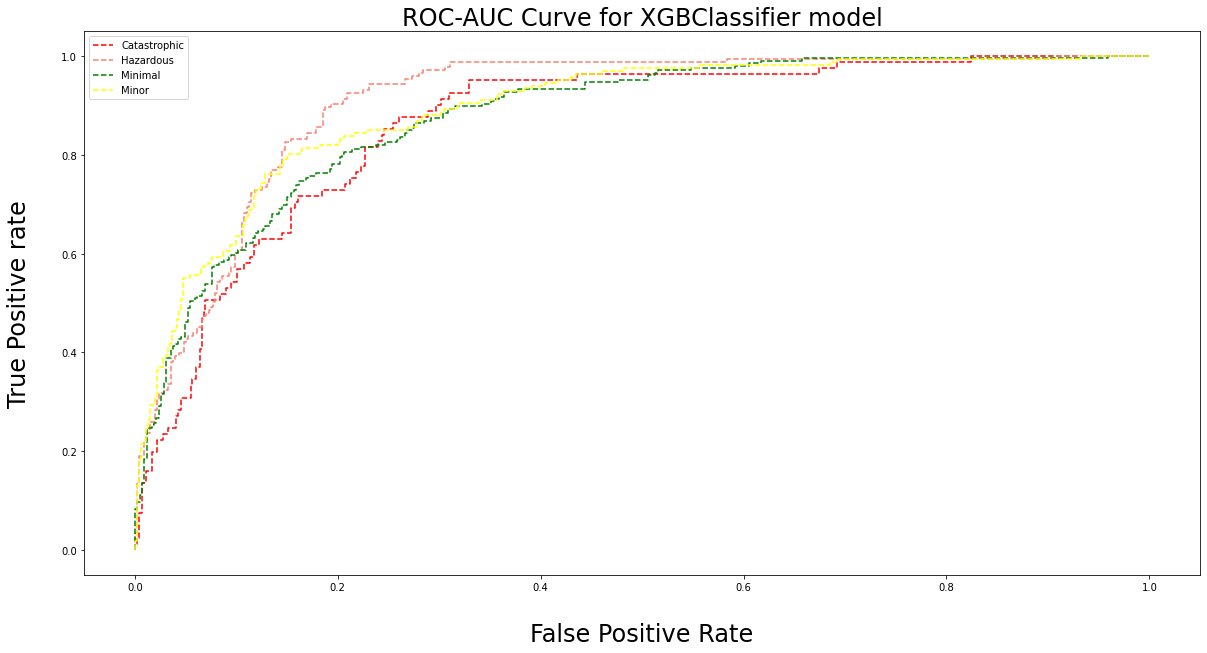

In [ ]:
plotROCAUC(xgb, X_test, y_test,2)

ROC-AUC Score for GradientBoostingClassifier is:  0.6623644802464888


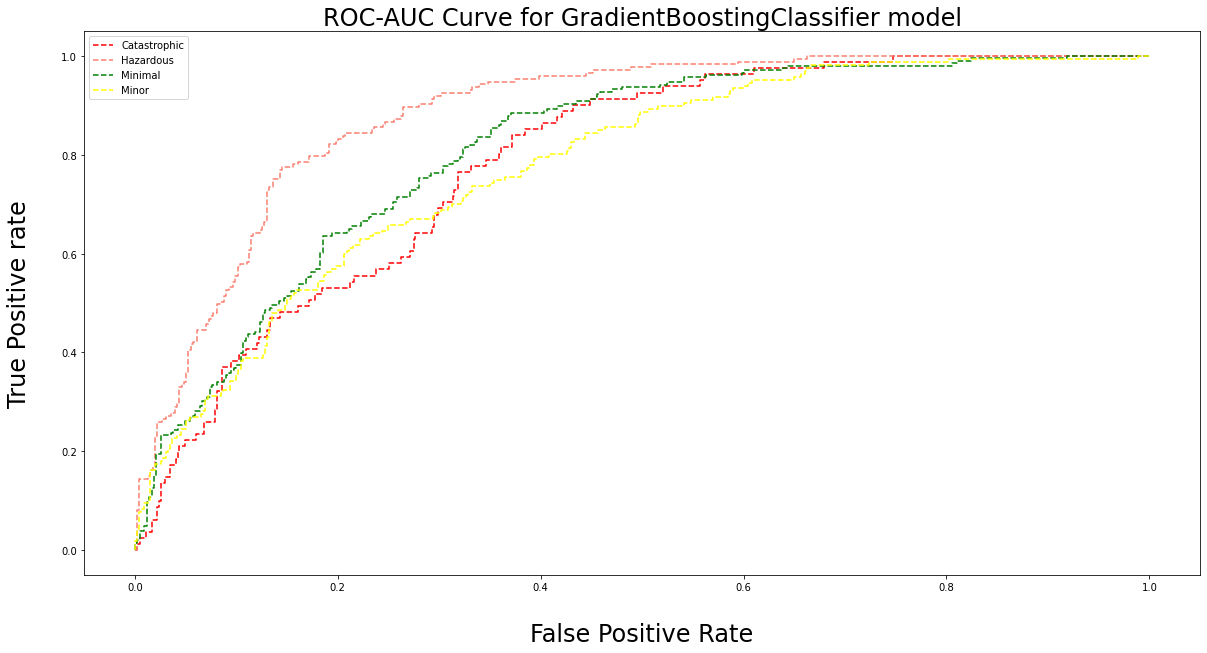

In [ ]:
plotROCAUC(gb, X_test, y_test,1)

ROC-AUC Score for RandomForestClassifier is:  0.737483352559425


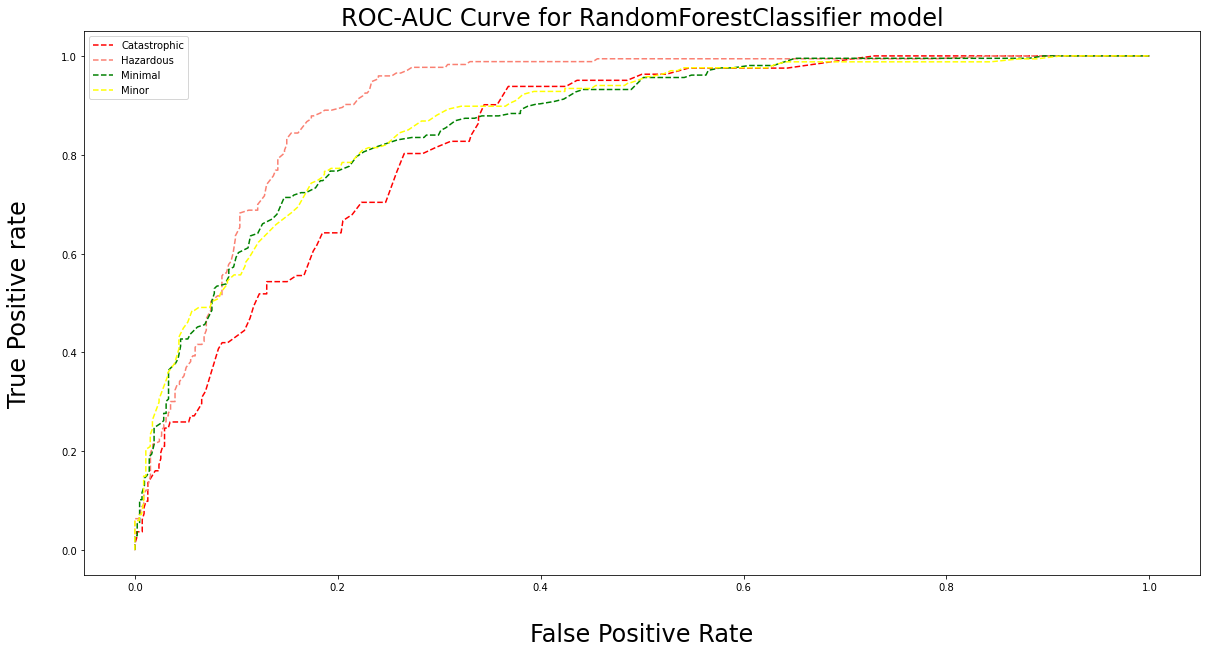

In [ ]:
plotROCAUC(forest, X_test, y_test,0)

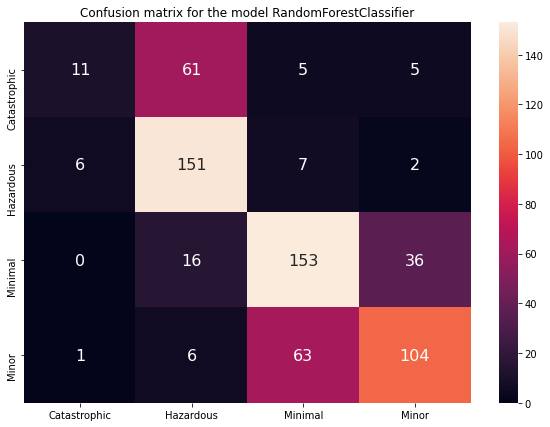

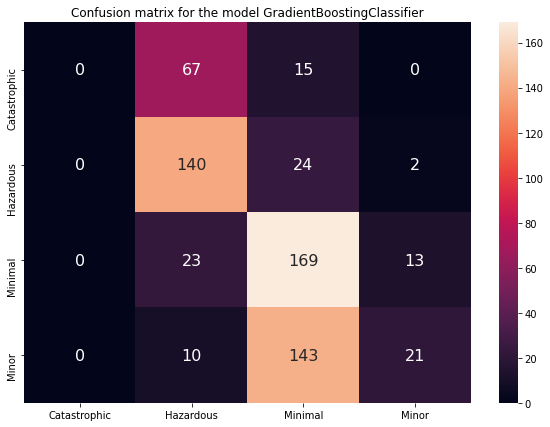

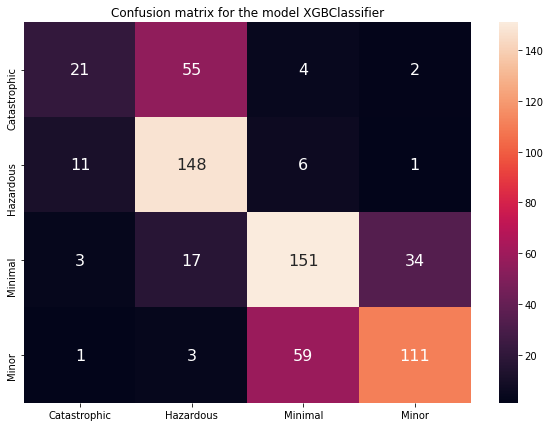

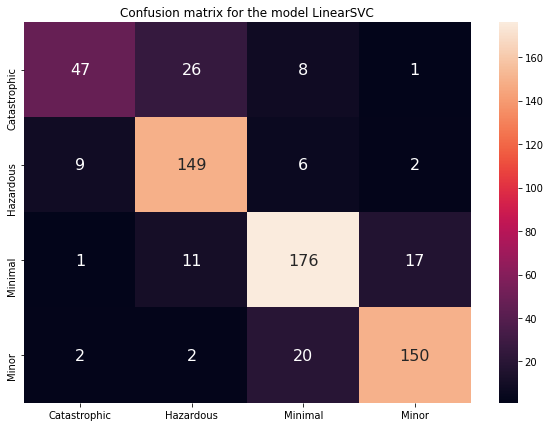

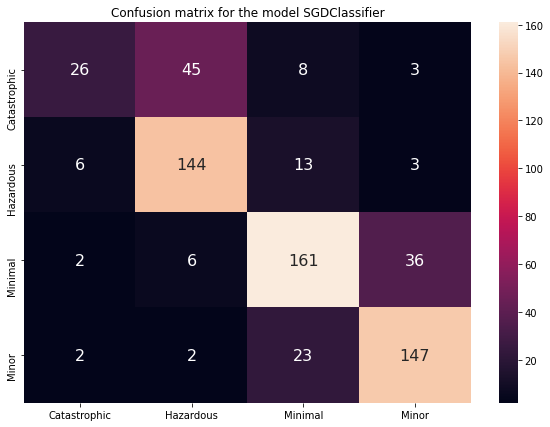

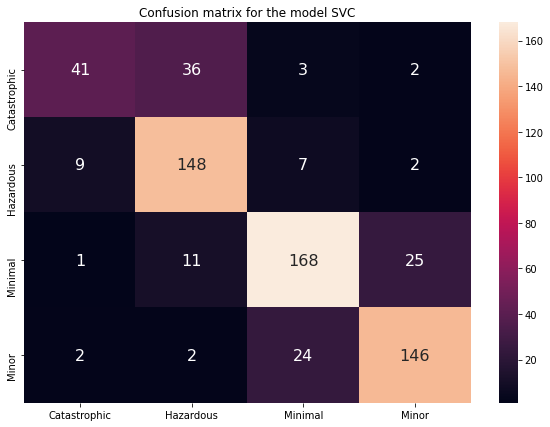

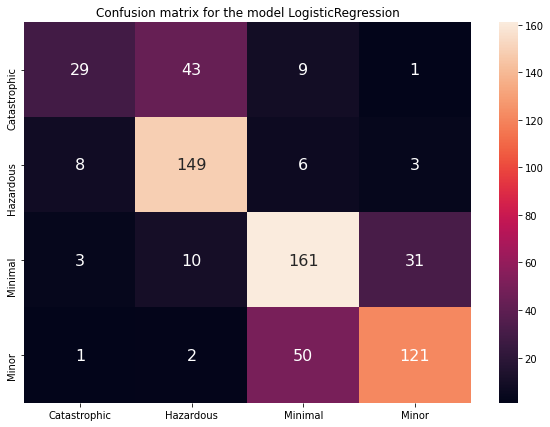

In [ ]:
from sklearn import metrics



from sklearn.metrics import plot_confusion_matrix
for ind, model in enumerate(modelList):
  y_pred = model.predict(X_test)
  matrix = metrics.confusion_matrix(y_test, y_pred)

  l = ['Catastrophic', 'Hazardous', 'Minimal', 'Minor']
  df_cm = pd.DataFrame(matrix, index = [i for i in "ABCD"],
                    columns = [i for i in "ABCD"])
  plt.figure(figsize = (10,7))
  plt.title(f"Confusion matrix for the model {modelListName[ind]}")
  sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=l, yticklabels=l, fmt='g')

## Lift Curve

# DEEP LEARNING